In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#readind data from csv file
data=pd.read_csv("NDAP_REPORT_7004.csv")

#Now making a dataframe
df=pd.DataFrame(data)

# df   #printing dataframe
(df[-20:])

Rowid Country  State lgd code  \
1453   1454   India              36   
1454   1455   India              36   
1455   1456   India              36   
1456   1457   India              36   
1457   1458   India              36   
1458   1459   India              36   
1459   1460   India              36   
1460   1461   India              36   
1461   1462   India              36   
1462   1463   India              36   
1463   1464   India              37   
1464   1465   India              37   
1465   1466   India              37   
1466   1467   India              37   
1467   1468   India              38   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
1453                                     Telangana                698   
1454                                     Telangana                698   
1455                                     Telangana                699   
1456                                     Telangana                699   
1457                                     Telangana                700   
1458                                     Telangana                700   
1459                                     Telangana                720   
1460                                     Telangana                720   
1461                                     Telangana                721   
1462                                     Telangana                721   
1463                                        Ladakh                  6   
1464                                        Ladakh                  6   
1465                                        Ladakh                  9   
1466                                        Ladakh                  9   
1467  The Dadra And Nagar Haveli And Daman And Diu                463   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
1453               Vikarabad  2011                                   Rural   
1454               Vikarabad  2011                                   Urban   
1455  Kumuram Bheem Asifabad  2011                                   Rural   
1456  Kumuram Bheem Asifabad  2011                                   Urban   
1457      Medchal Malkajgiri  2011                                   Rural   
1458      Medchal Malkajgiri  2011                                   Urban   
1459                  Mulugu  2011                                   Rural   
1460                  Mulugu  2011                                   Urban   
1461              Narayanpet  2011                                   Rural   
1462              Narayanpet  2011                                   Urban   
1463                  Kargil  2011                                   Rural   
1464                  Kargil  2011                                   Urban   
1465              Leh Ladakh  2011                                   Rural   
1466              Leh Ladakh  2011                                   Urban   
1467                   Daman  2011                                   Rural   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

     Number o

In [2]:
#Printing no. of rows and columns in dataframe
print('Number of Rows is: '+ str(len(df.index)))
print('Number of Columns is: '+ str(len(df.columns)))

Number of Rows is: 1473
Number of Columns is: 19


In [3]:
#Printing Number of Unique Values for each column
n=df.nunique(axis=0)
print(n)

Rowid                                                                                        1473
Country                                                                                         1
State lgd code                                                                                 36
State                                                                                          36
District lgd code                                                                             737
District                                                                                      732
Year                                                                                            1
Type of residence namely rural or urban                                                         2
Number of census houses                                                                      1438
Houses having grass or thatch or bamboo etc. as material of wall                             1365
Houses having plasti

In [4]:
df.dtypes

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                       object
Houses having grass or thatch or bamboo etc. as material of wall                           

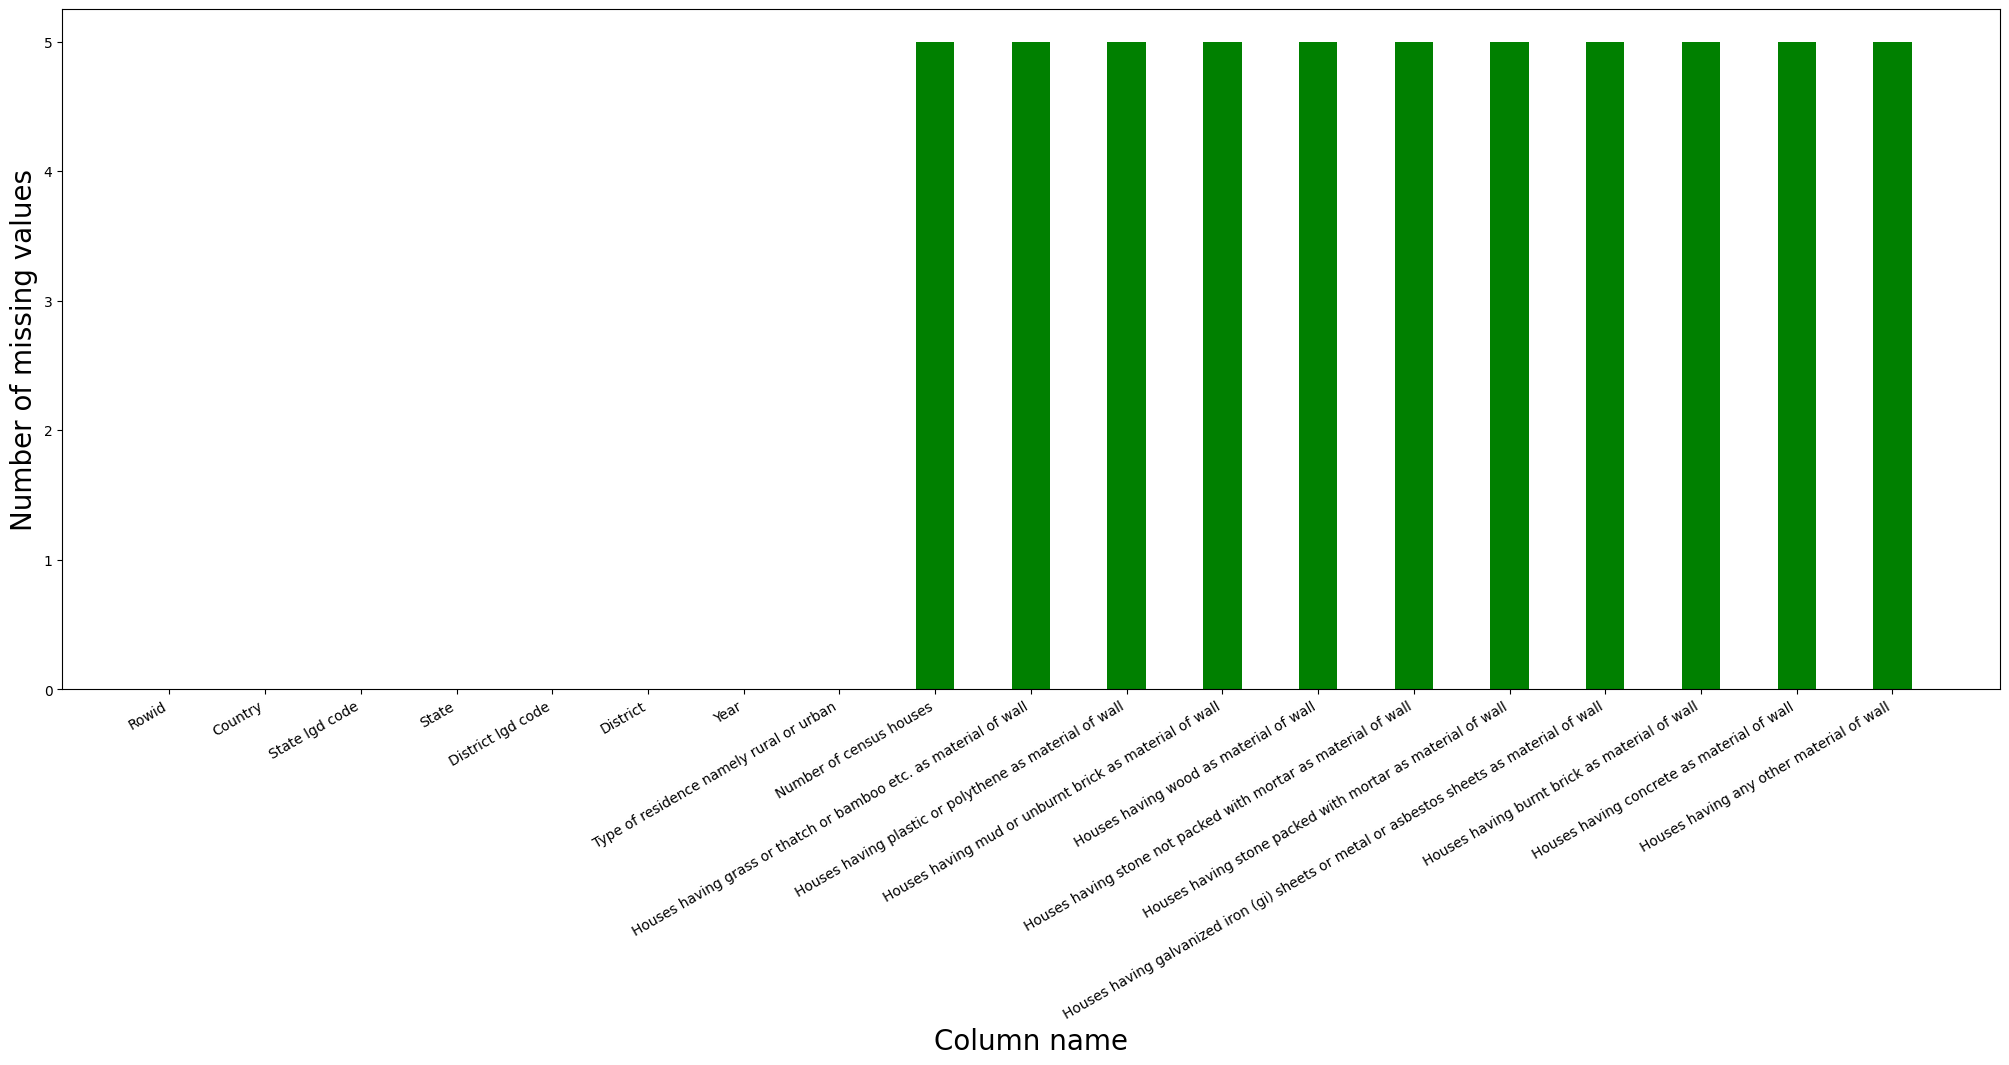

In [5]:
#Printing bar plot for missing values for each column
heading=list((df.isnull().sum()).keys()) #Creating list for each column
values=list(df.isnull().sum()) #List for No. of unique values of each column
fig=plt.figure(figsize=(25,10))
plt.bar(heading, values, color ='green',width = 0.4)  #Creating a bar plot 
fig.autofmt_xdate()
plt.ylabel('Number of missing values',fontsize=20)
plt.xlabel('Column name',fontsize=20)
plt.show()



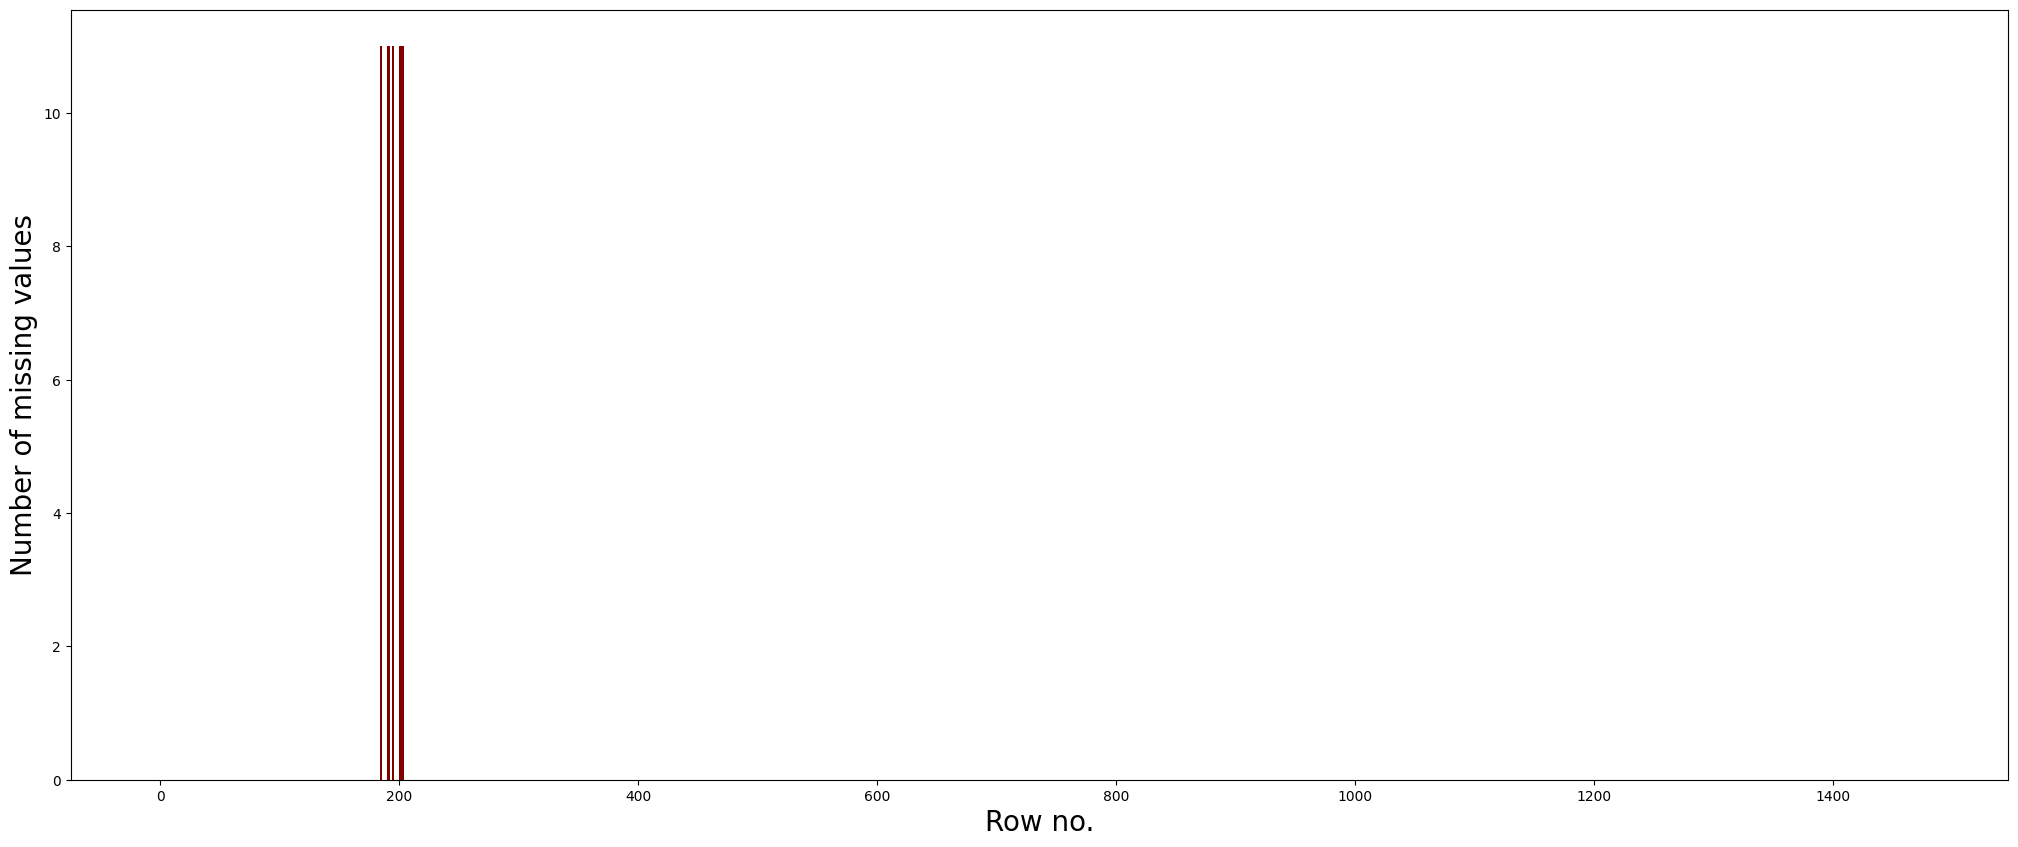

In [6]:
#Printing bar plot for missing values for each row
heading=list((df.isnull().sum(axis=1)).keys())
values=list(df.isnull().sum(axis=1))    #List for No. of unique values of each row
plt.figure(figsize=(25,10))
plt.bar(heading,values, color ='maroon',width =2) #Creating a bar plot
plt.ylabel('Number of missing values',fontsize=20)
plt.xlabel('Row no.',fontsize=20)
plt.show()

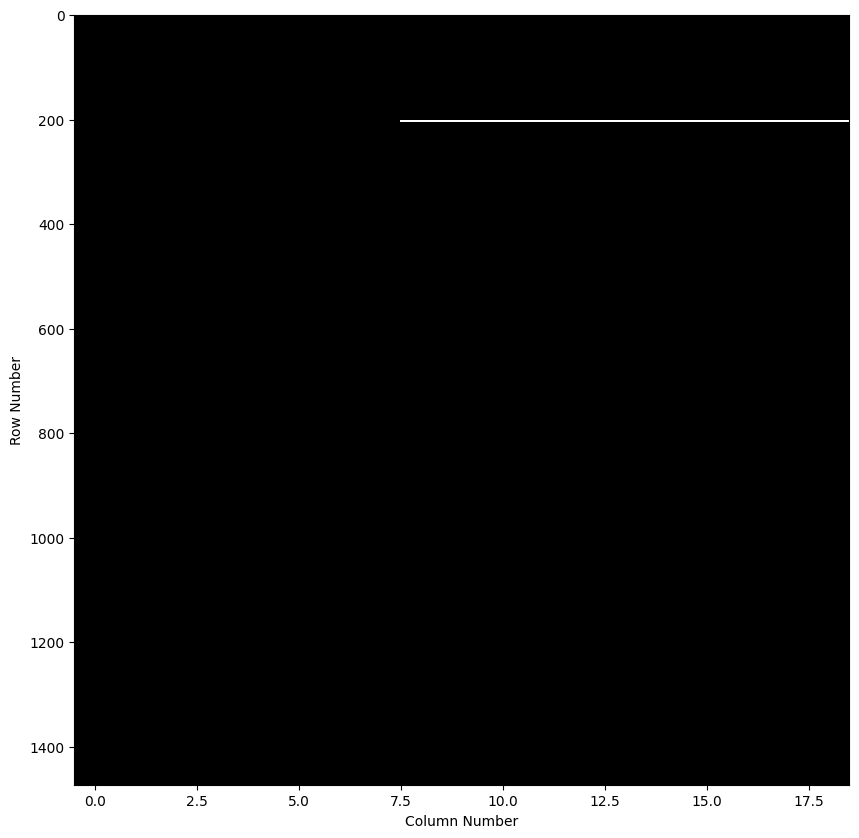

In [7]:
#Doing some additional EDA plotting graph for missing values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Row Number")
plt.show()

In [8]:
#Now cleaning the data
#There is string 'zero' in place of value '0' so we need to replace it
for i in range(0,19):
    df.iloc[:,i]=df.iloc[:,i].replace("zero",0)      #or we can use df[df.columns[i]]
    
# Another method
# for column in df:
#     df[column]=df[column].replace("zero",0)
        
    
#Also filling the empty spaces in dataframe with 0   
df = df.fillna(0)

for j in range(8,11):
    df.iloc[:,j] = df.iloc[:,j].astype('float64')

    #Method-2
# for i in range(8,11):
#     df[df.columns[i]] = df[df.columns[i]].astype('float64')

df.dtypes

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

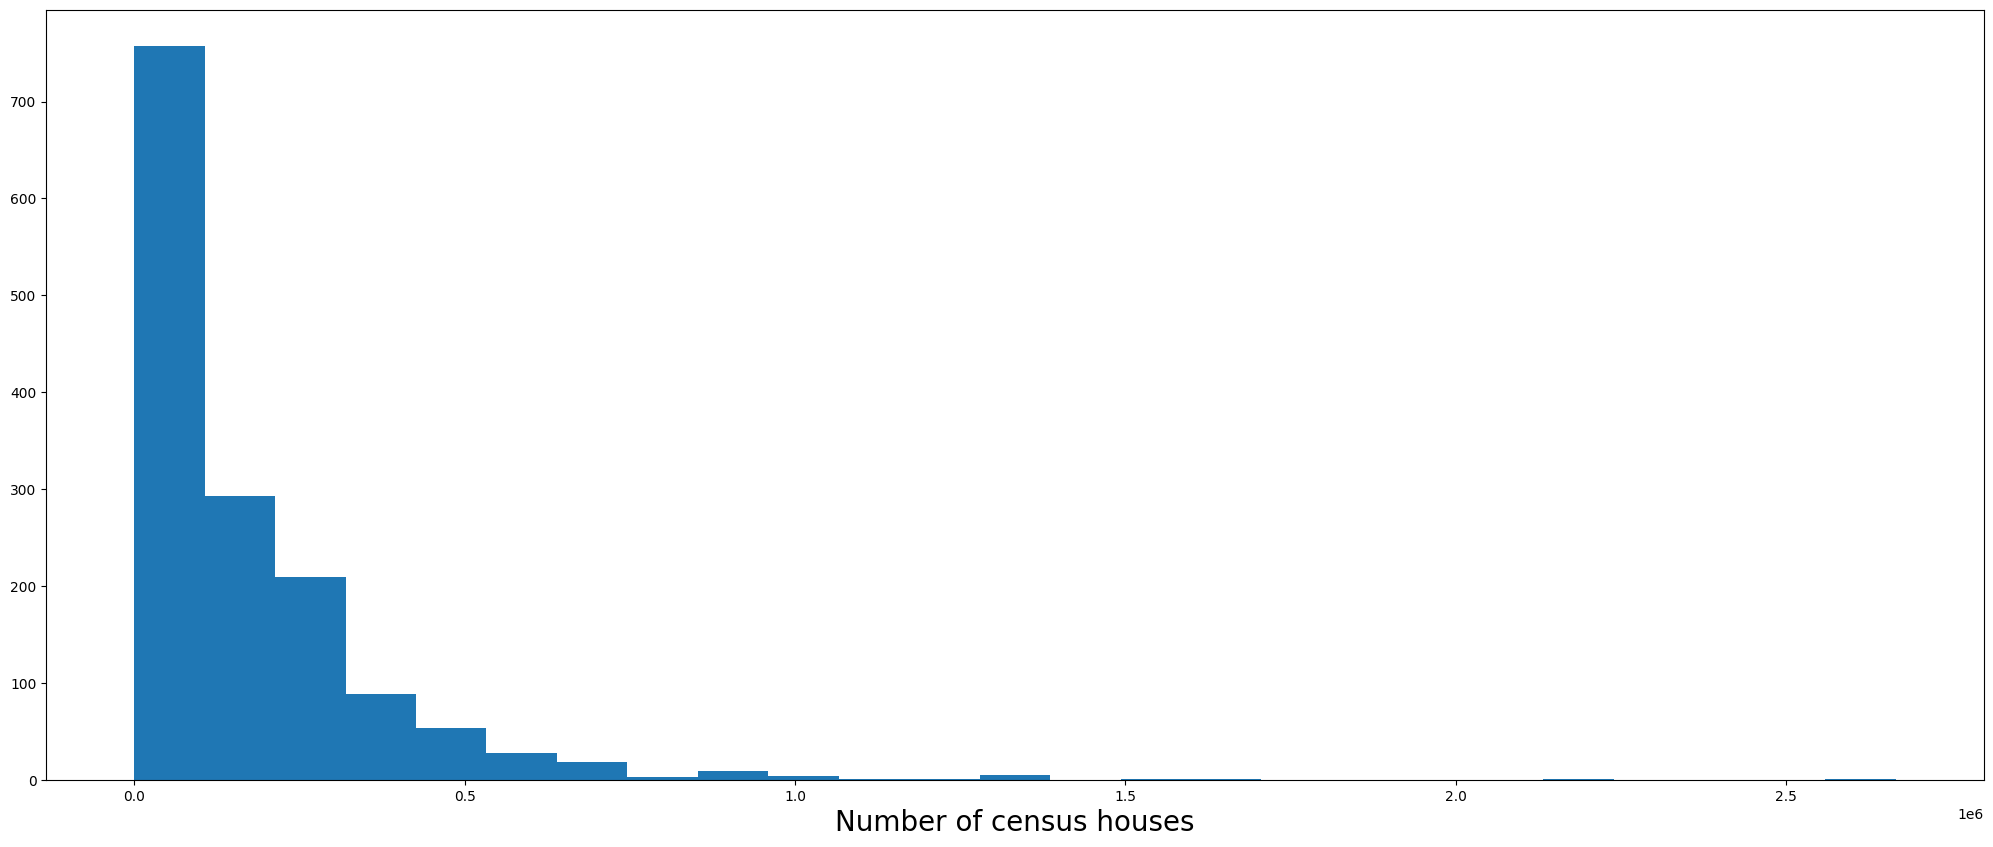

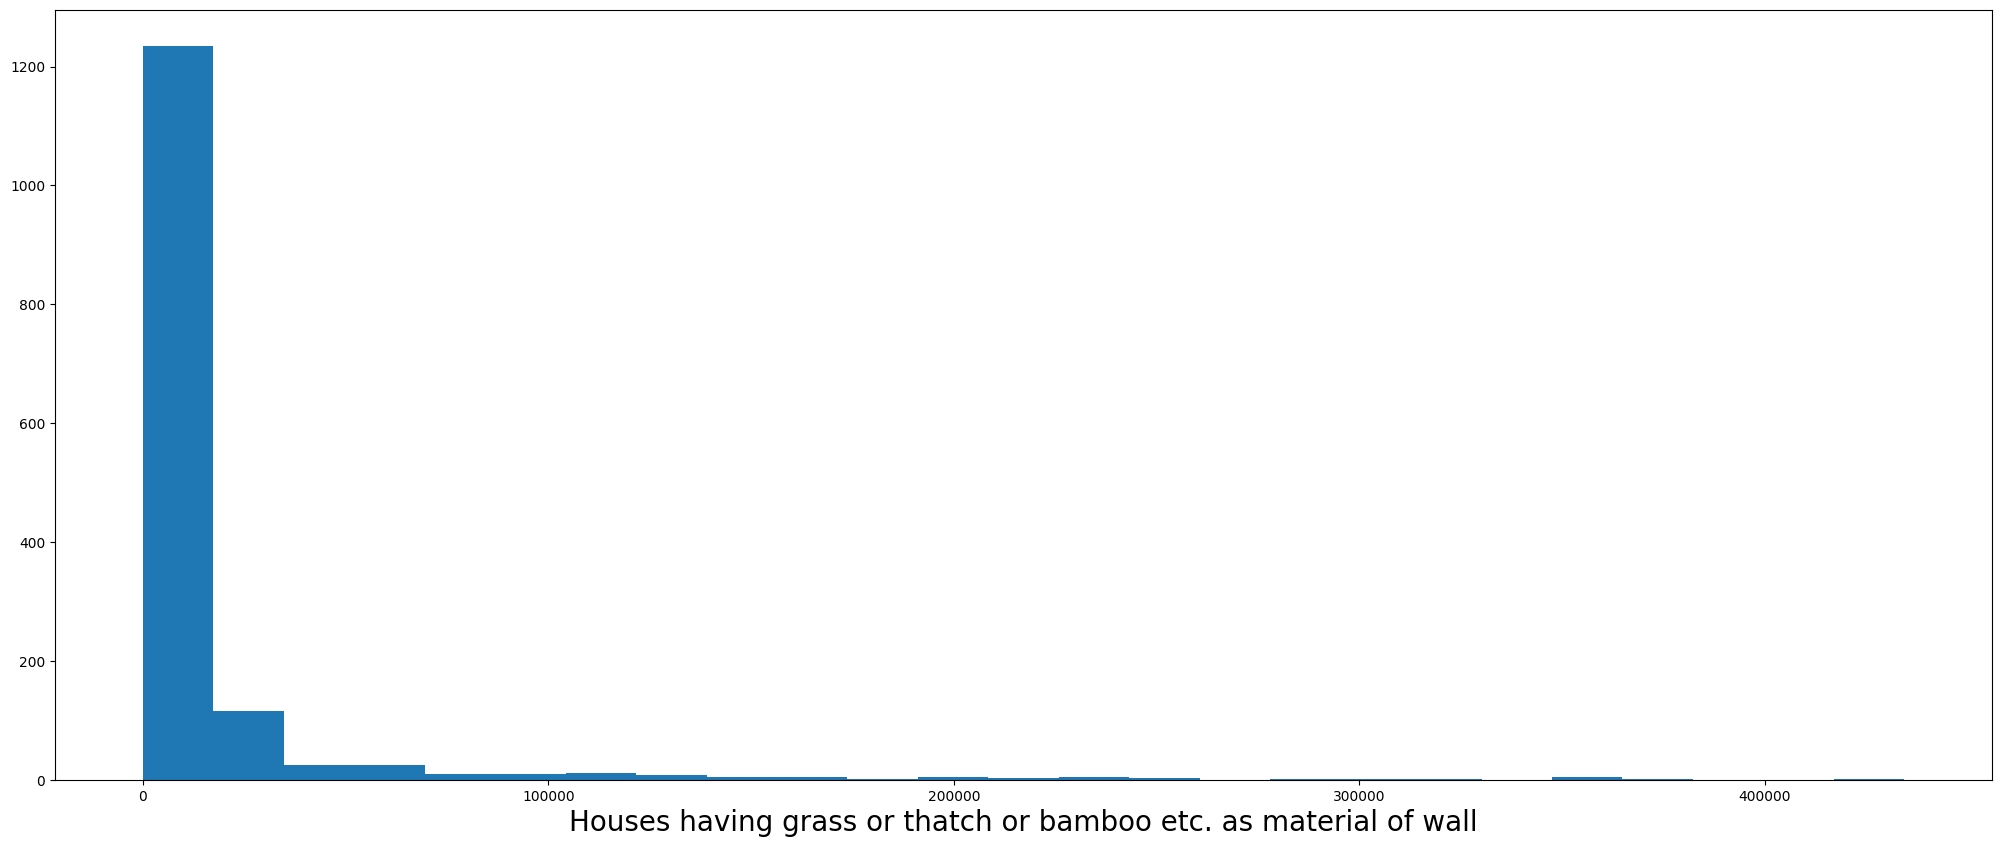

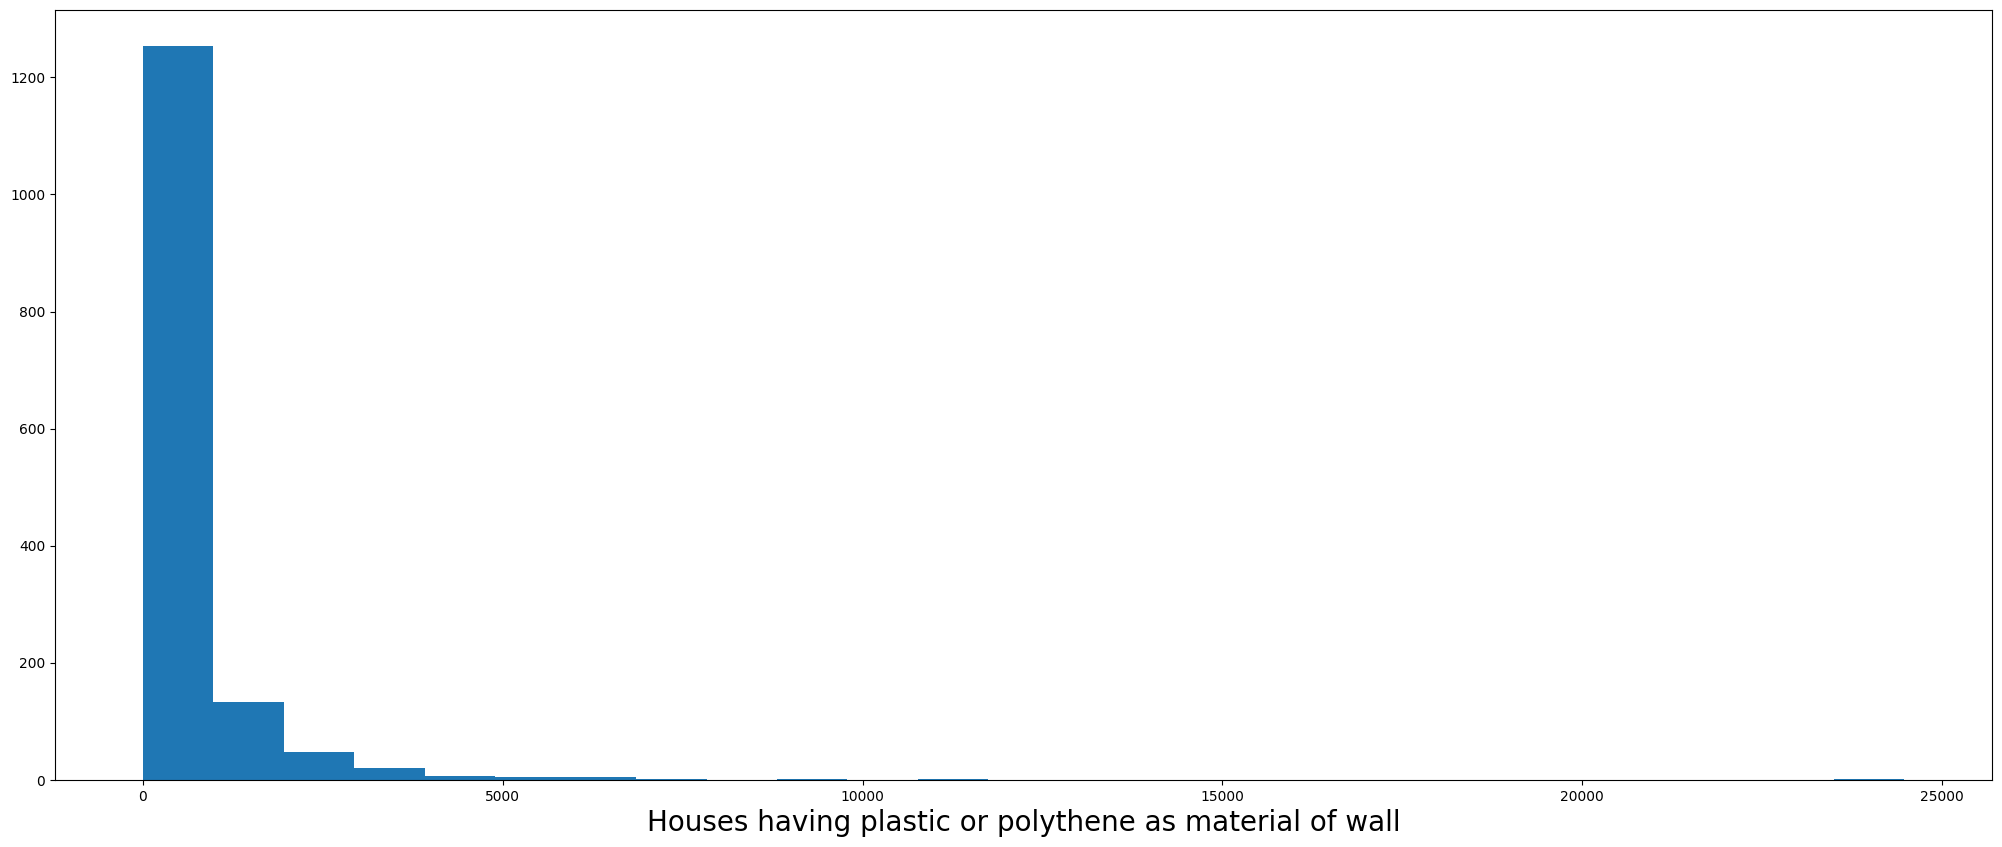

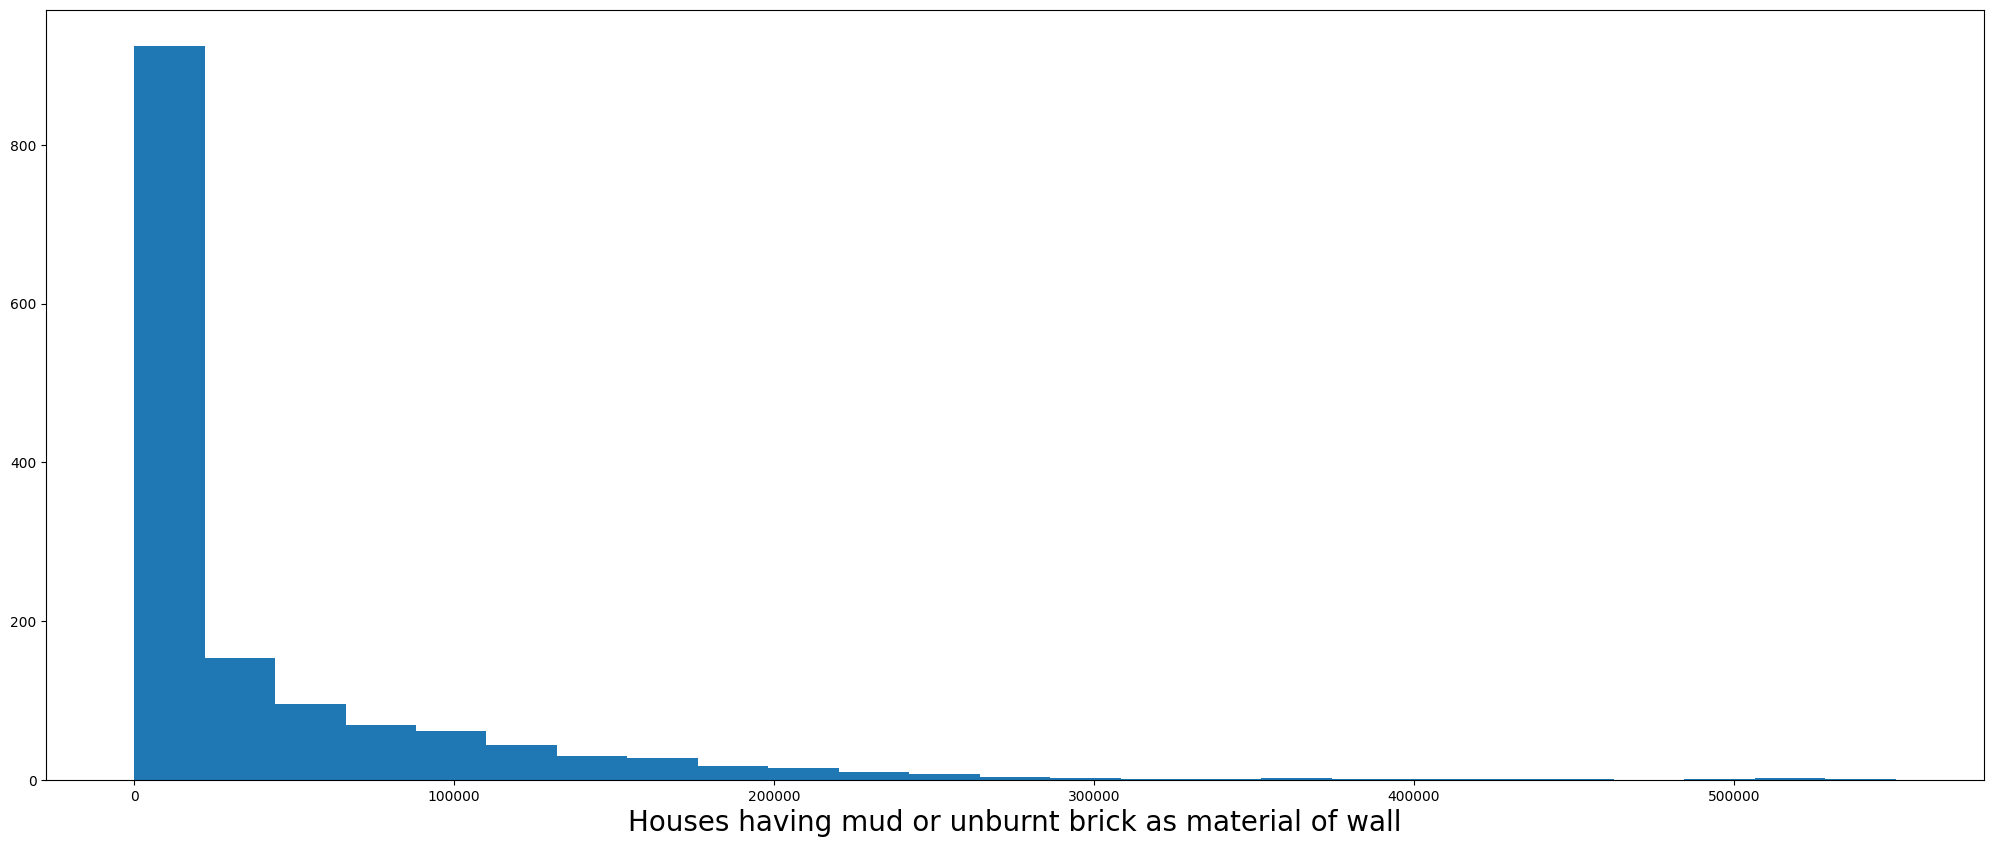

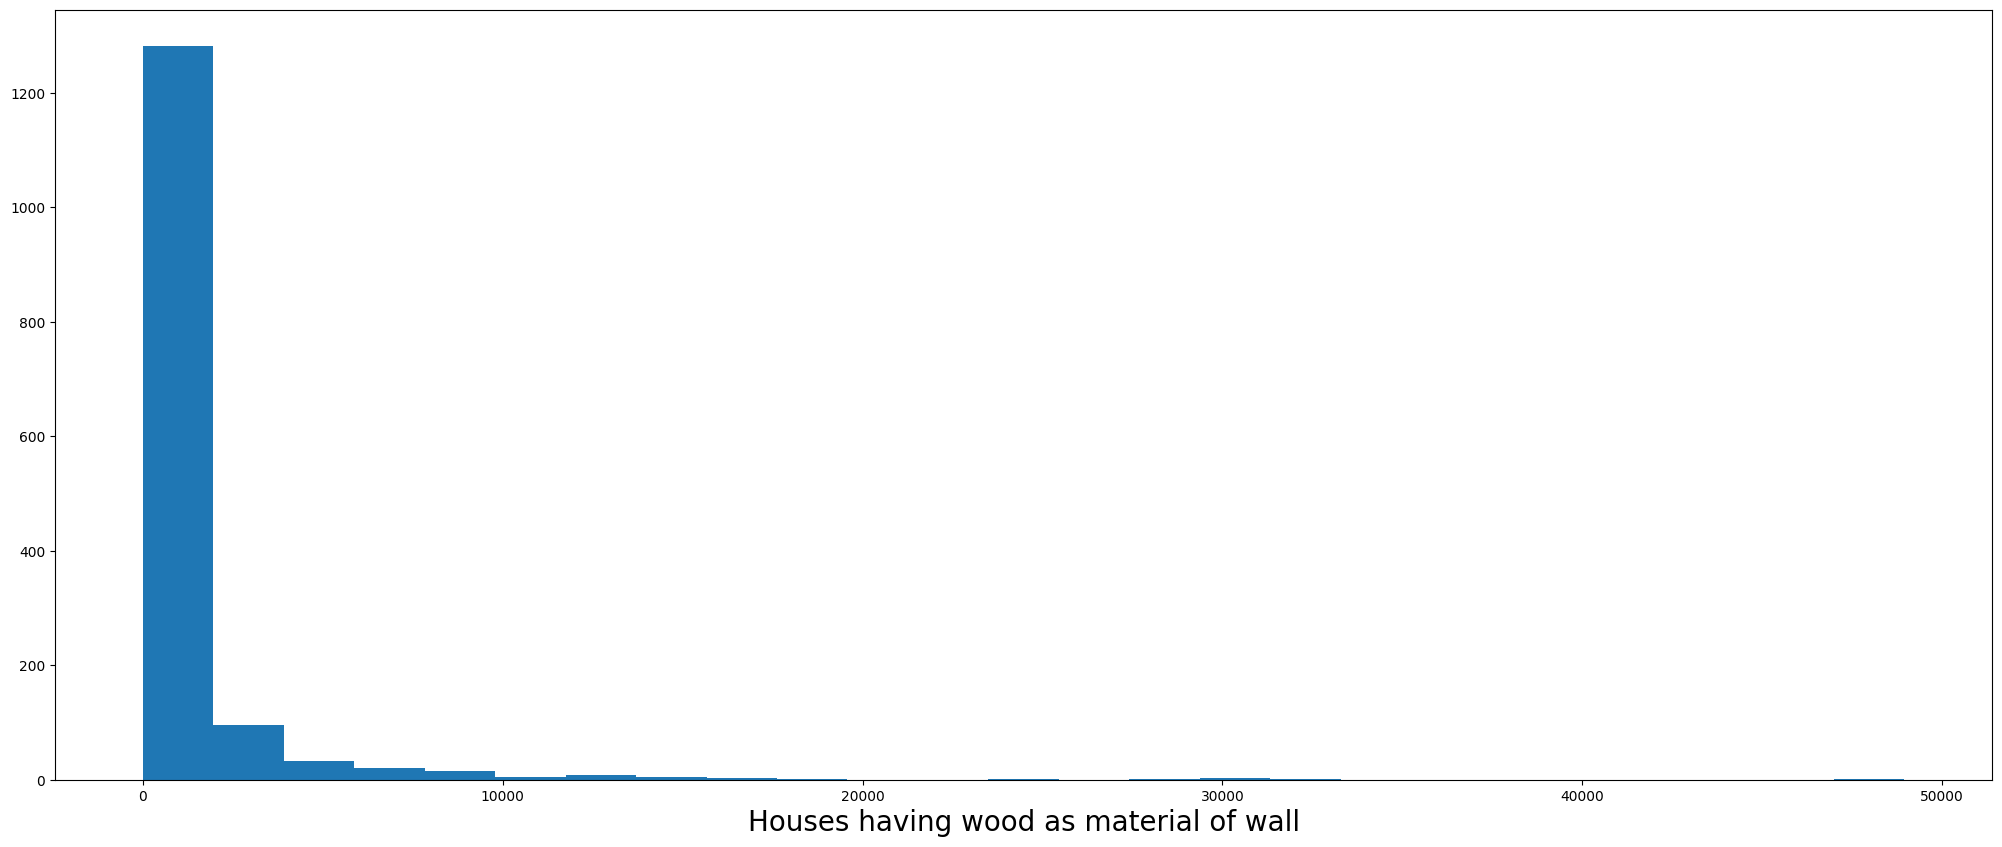

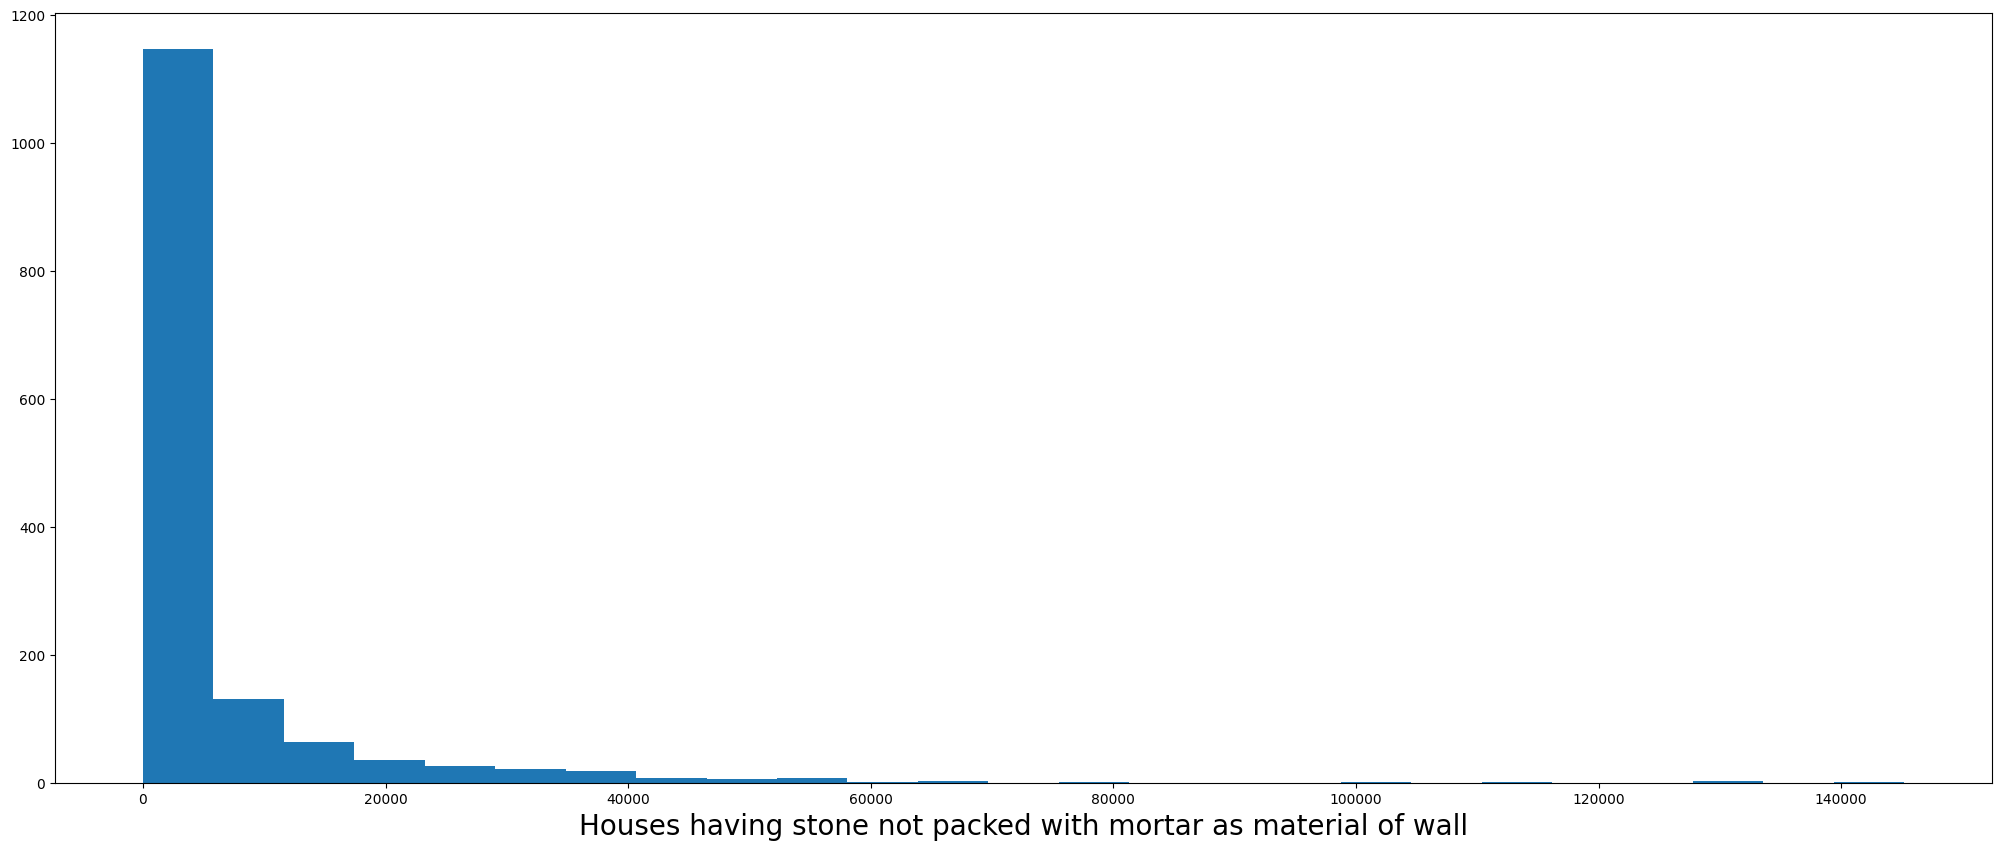

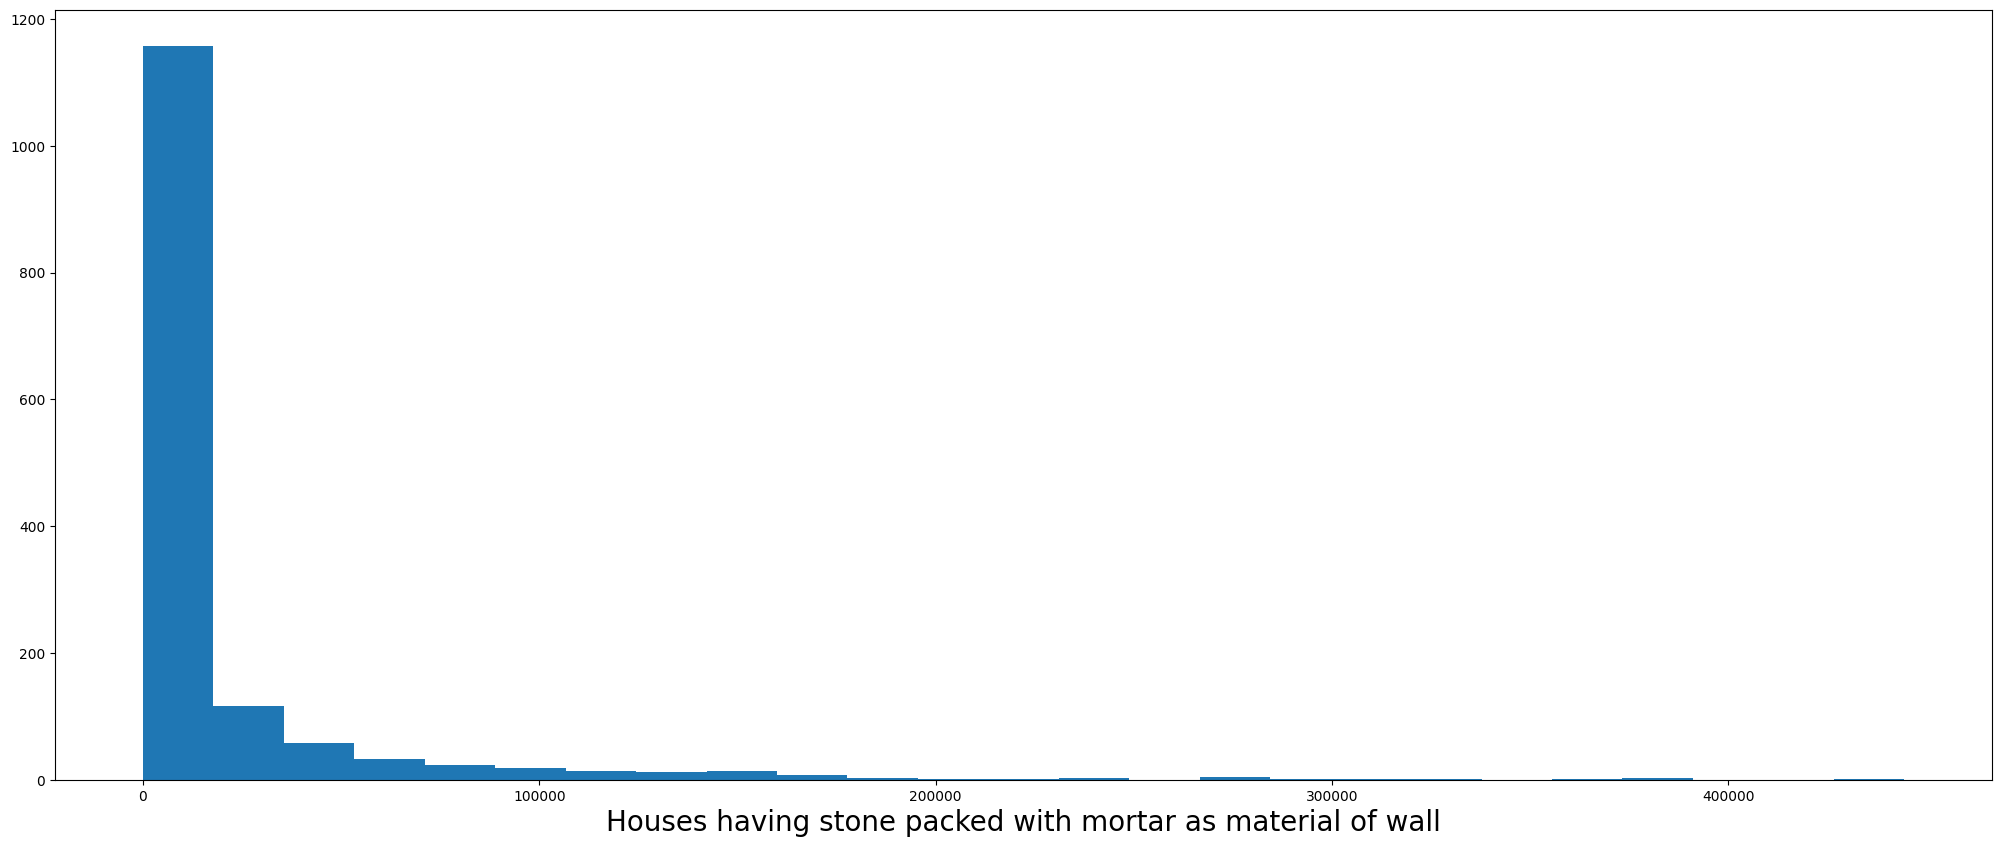

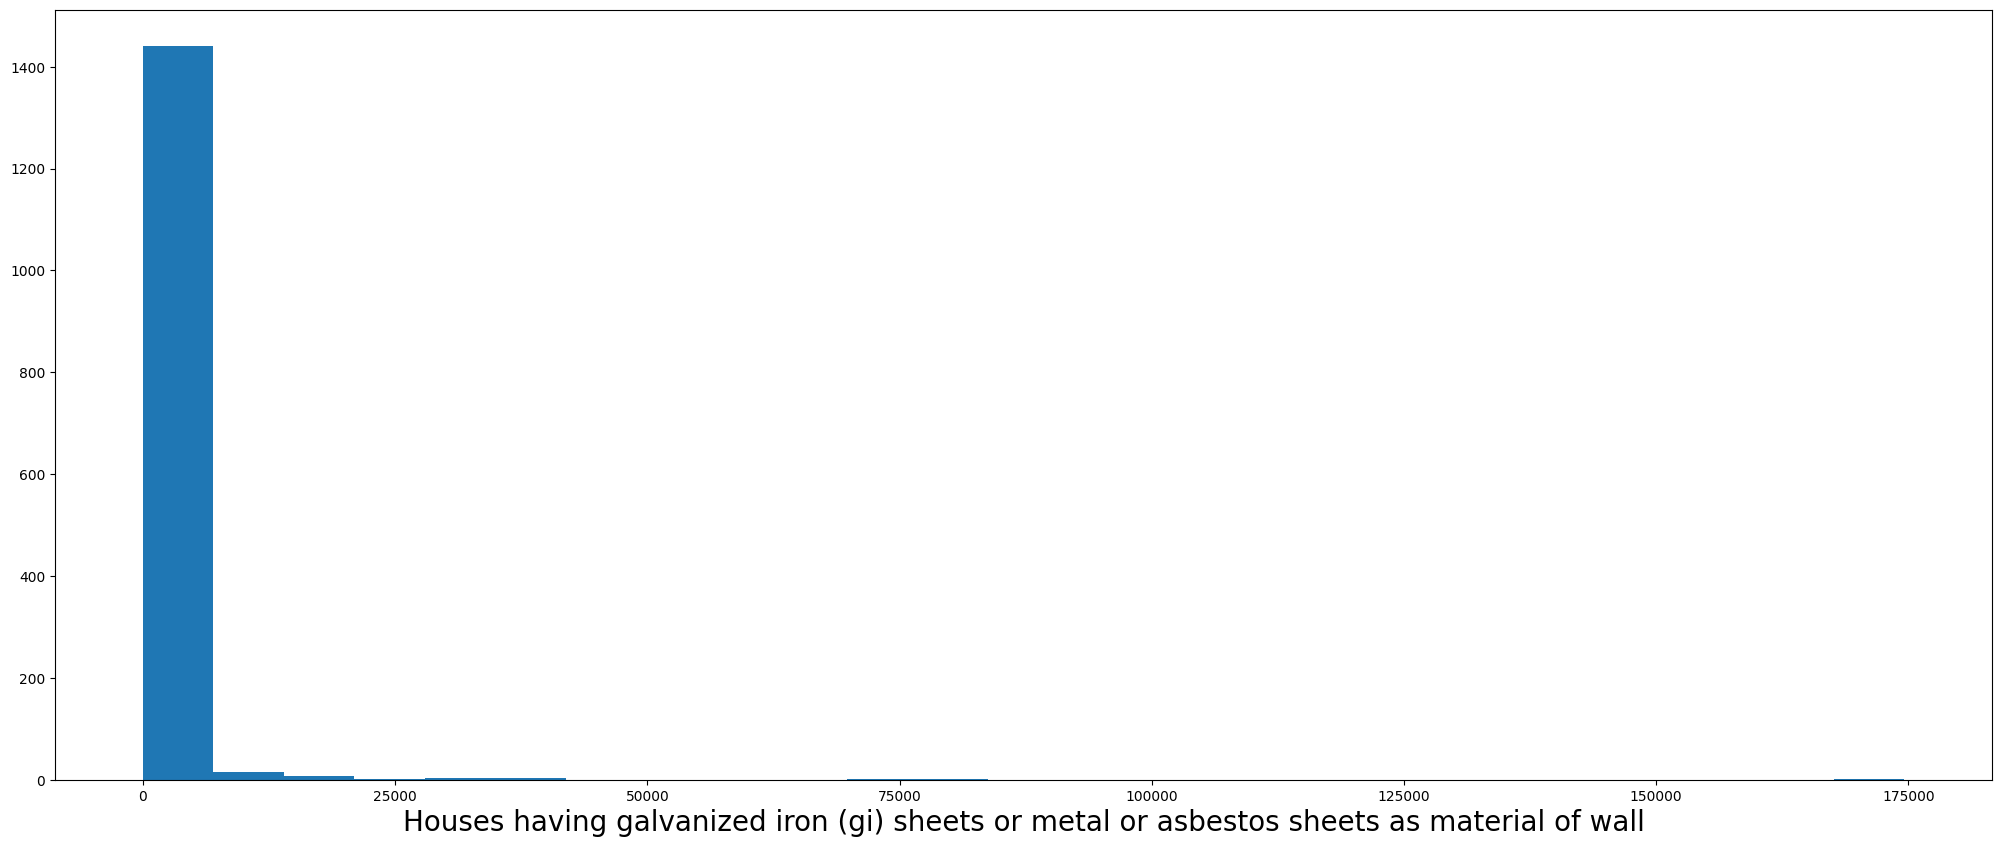

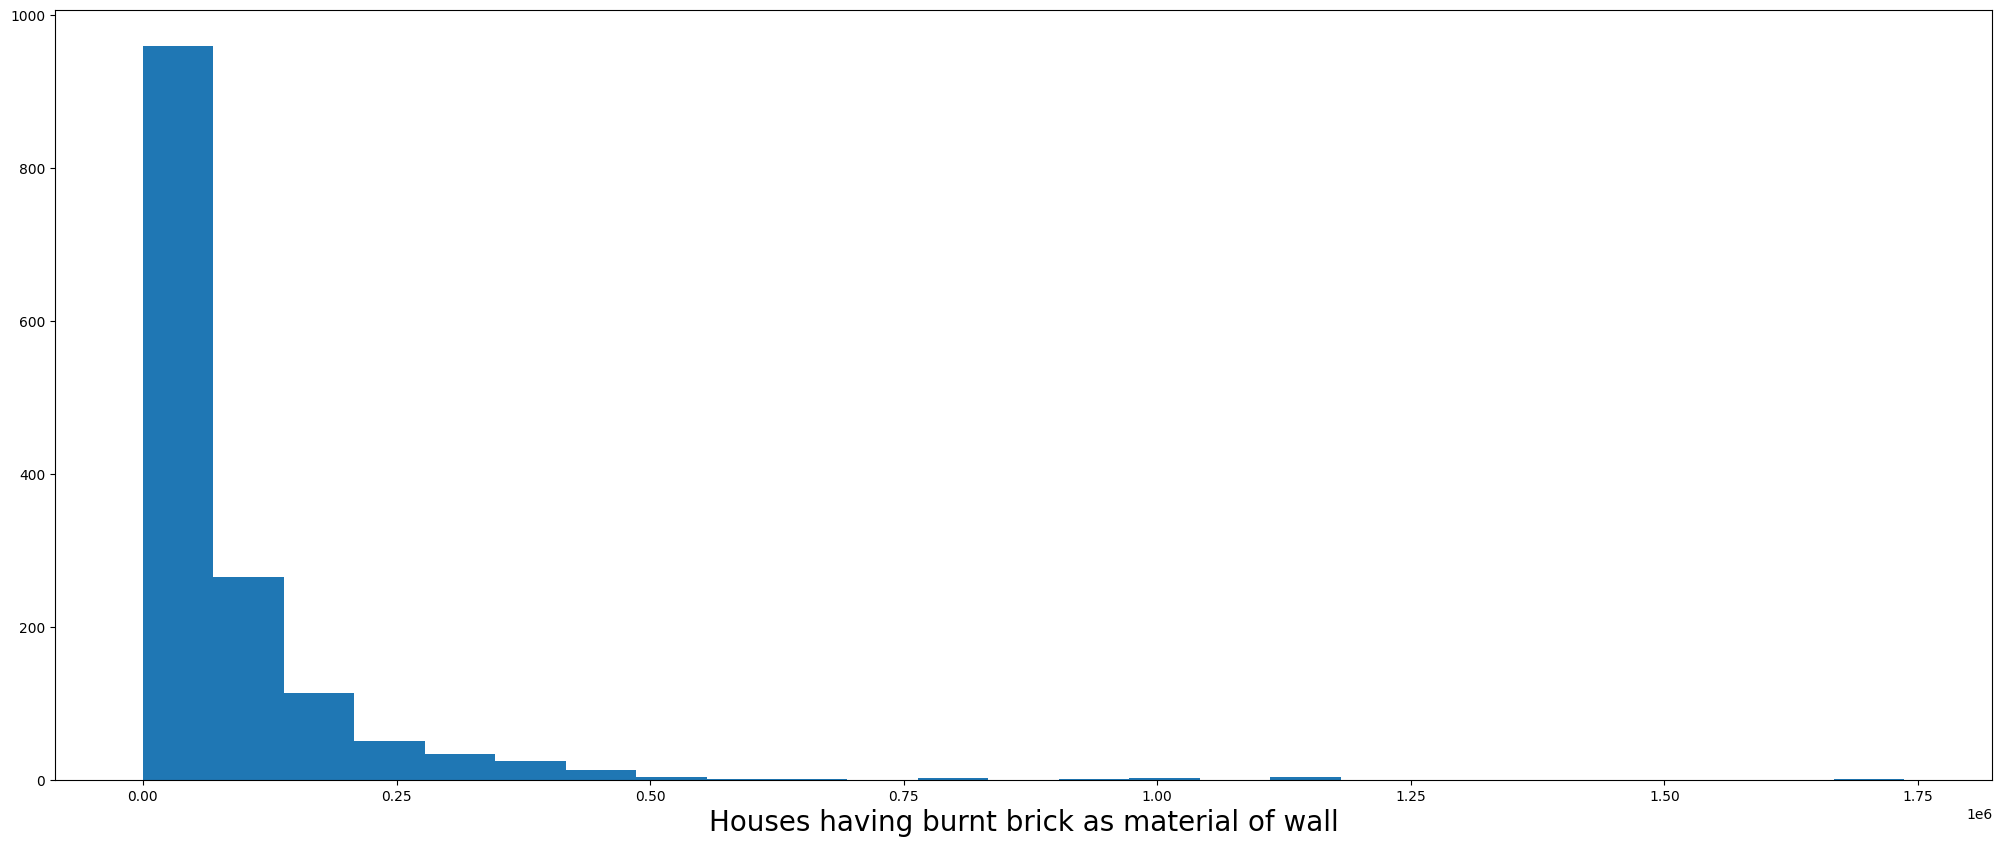

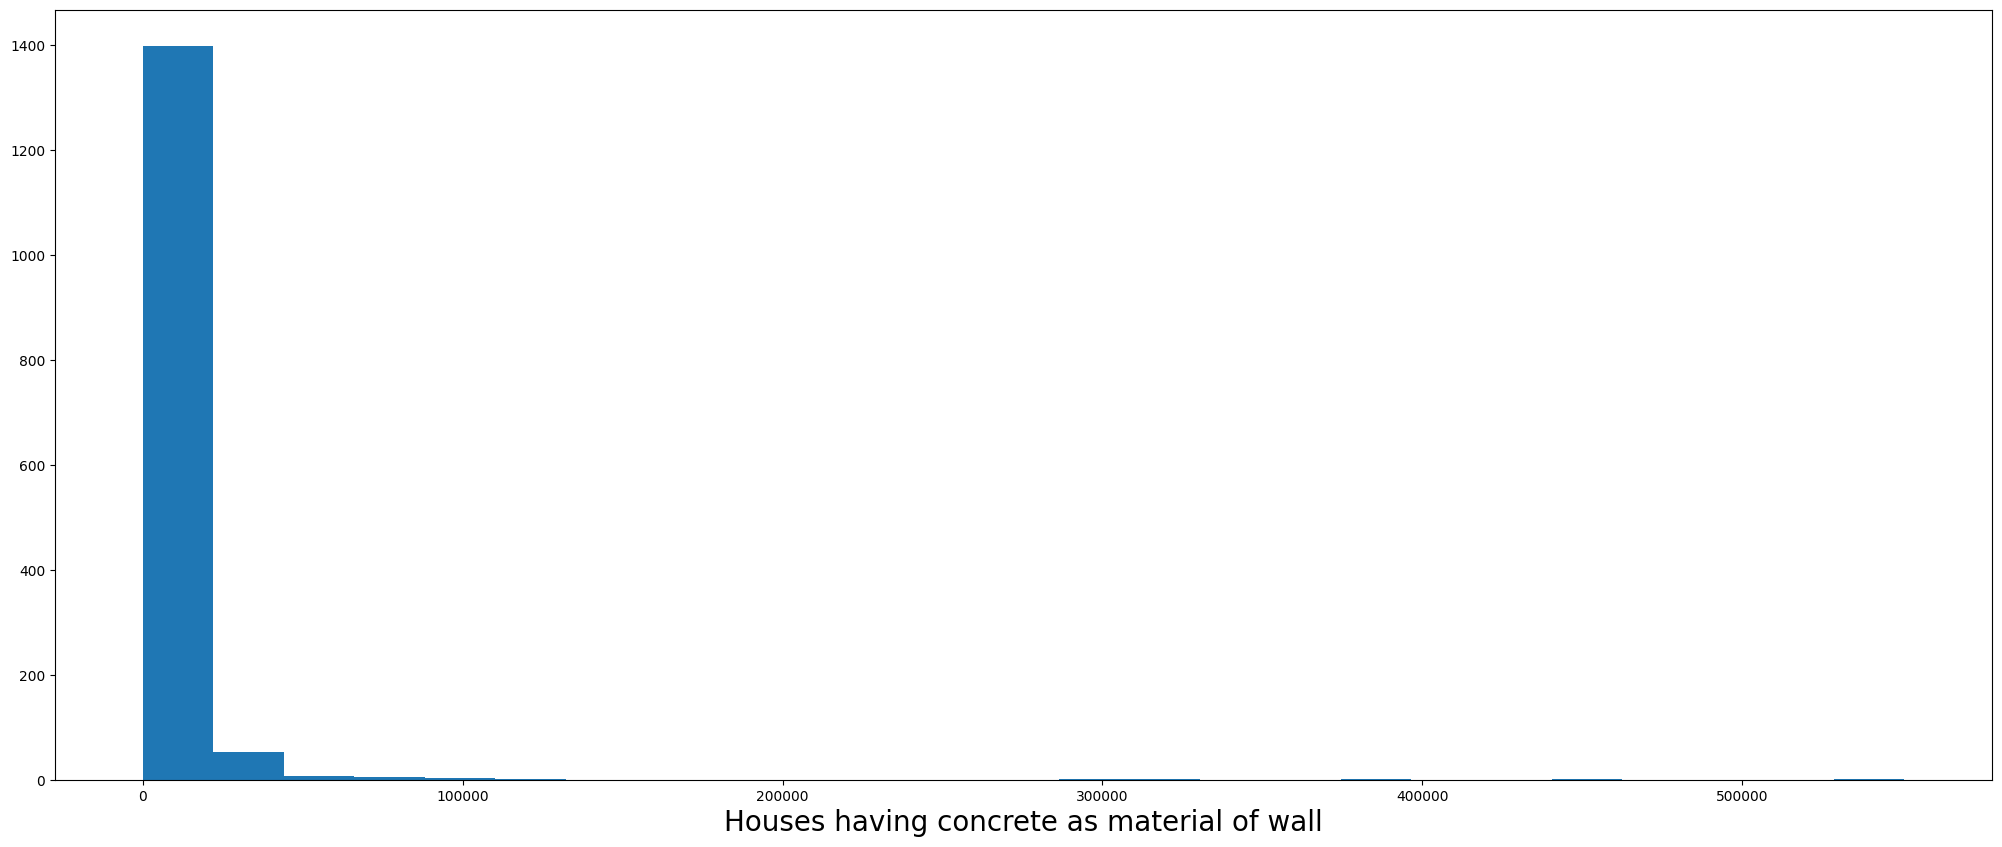

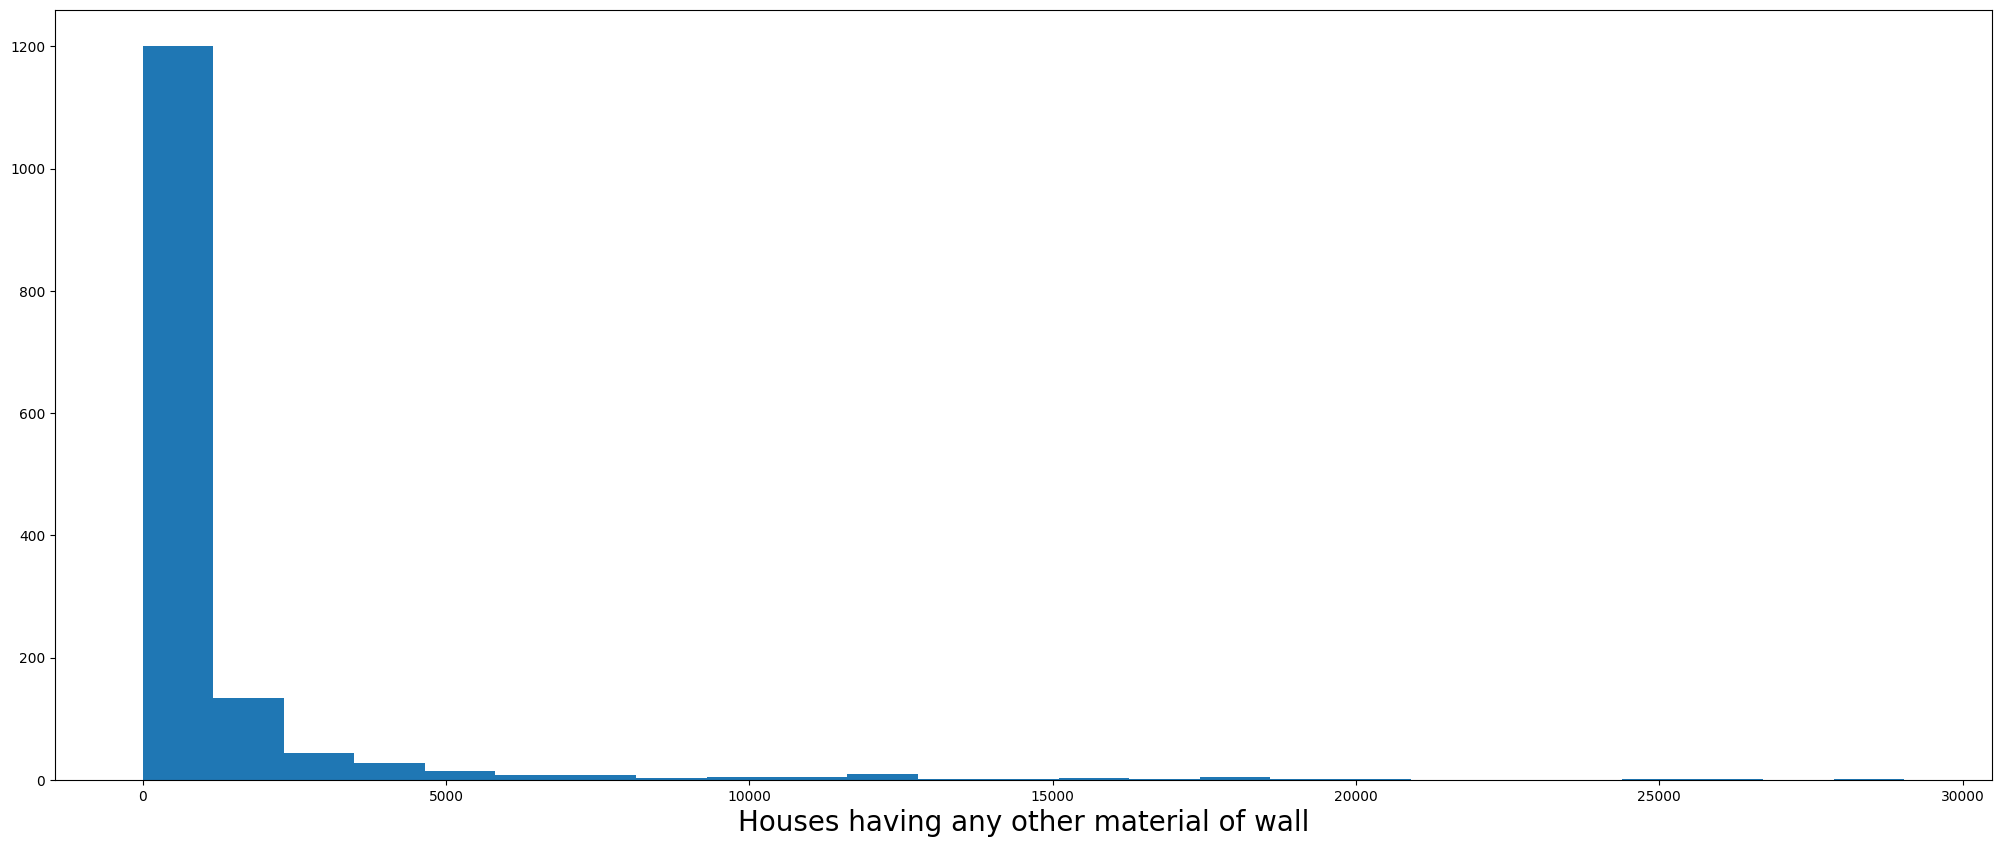

In [9]:
#Now Making a histogram plot for continuous and discrete variables
#But by looking towards the dataframe almost all columns are continuous
#So now making histogram for continuous variables


names=list(df.columns) #Making a list for column names 

for i in range(len(names)):  #For each column
    if (df[names[i]].dtypes == 'float64'):  #The column we need for histogram
        plt.figure(figsize=(25,10)) 
        plt.hist(df.iloc[:,i],bins=25) #Plotting Histogram
        plt.xlabel(names[i],fontsize=20)
        plt.show()



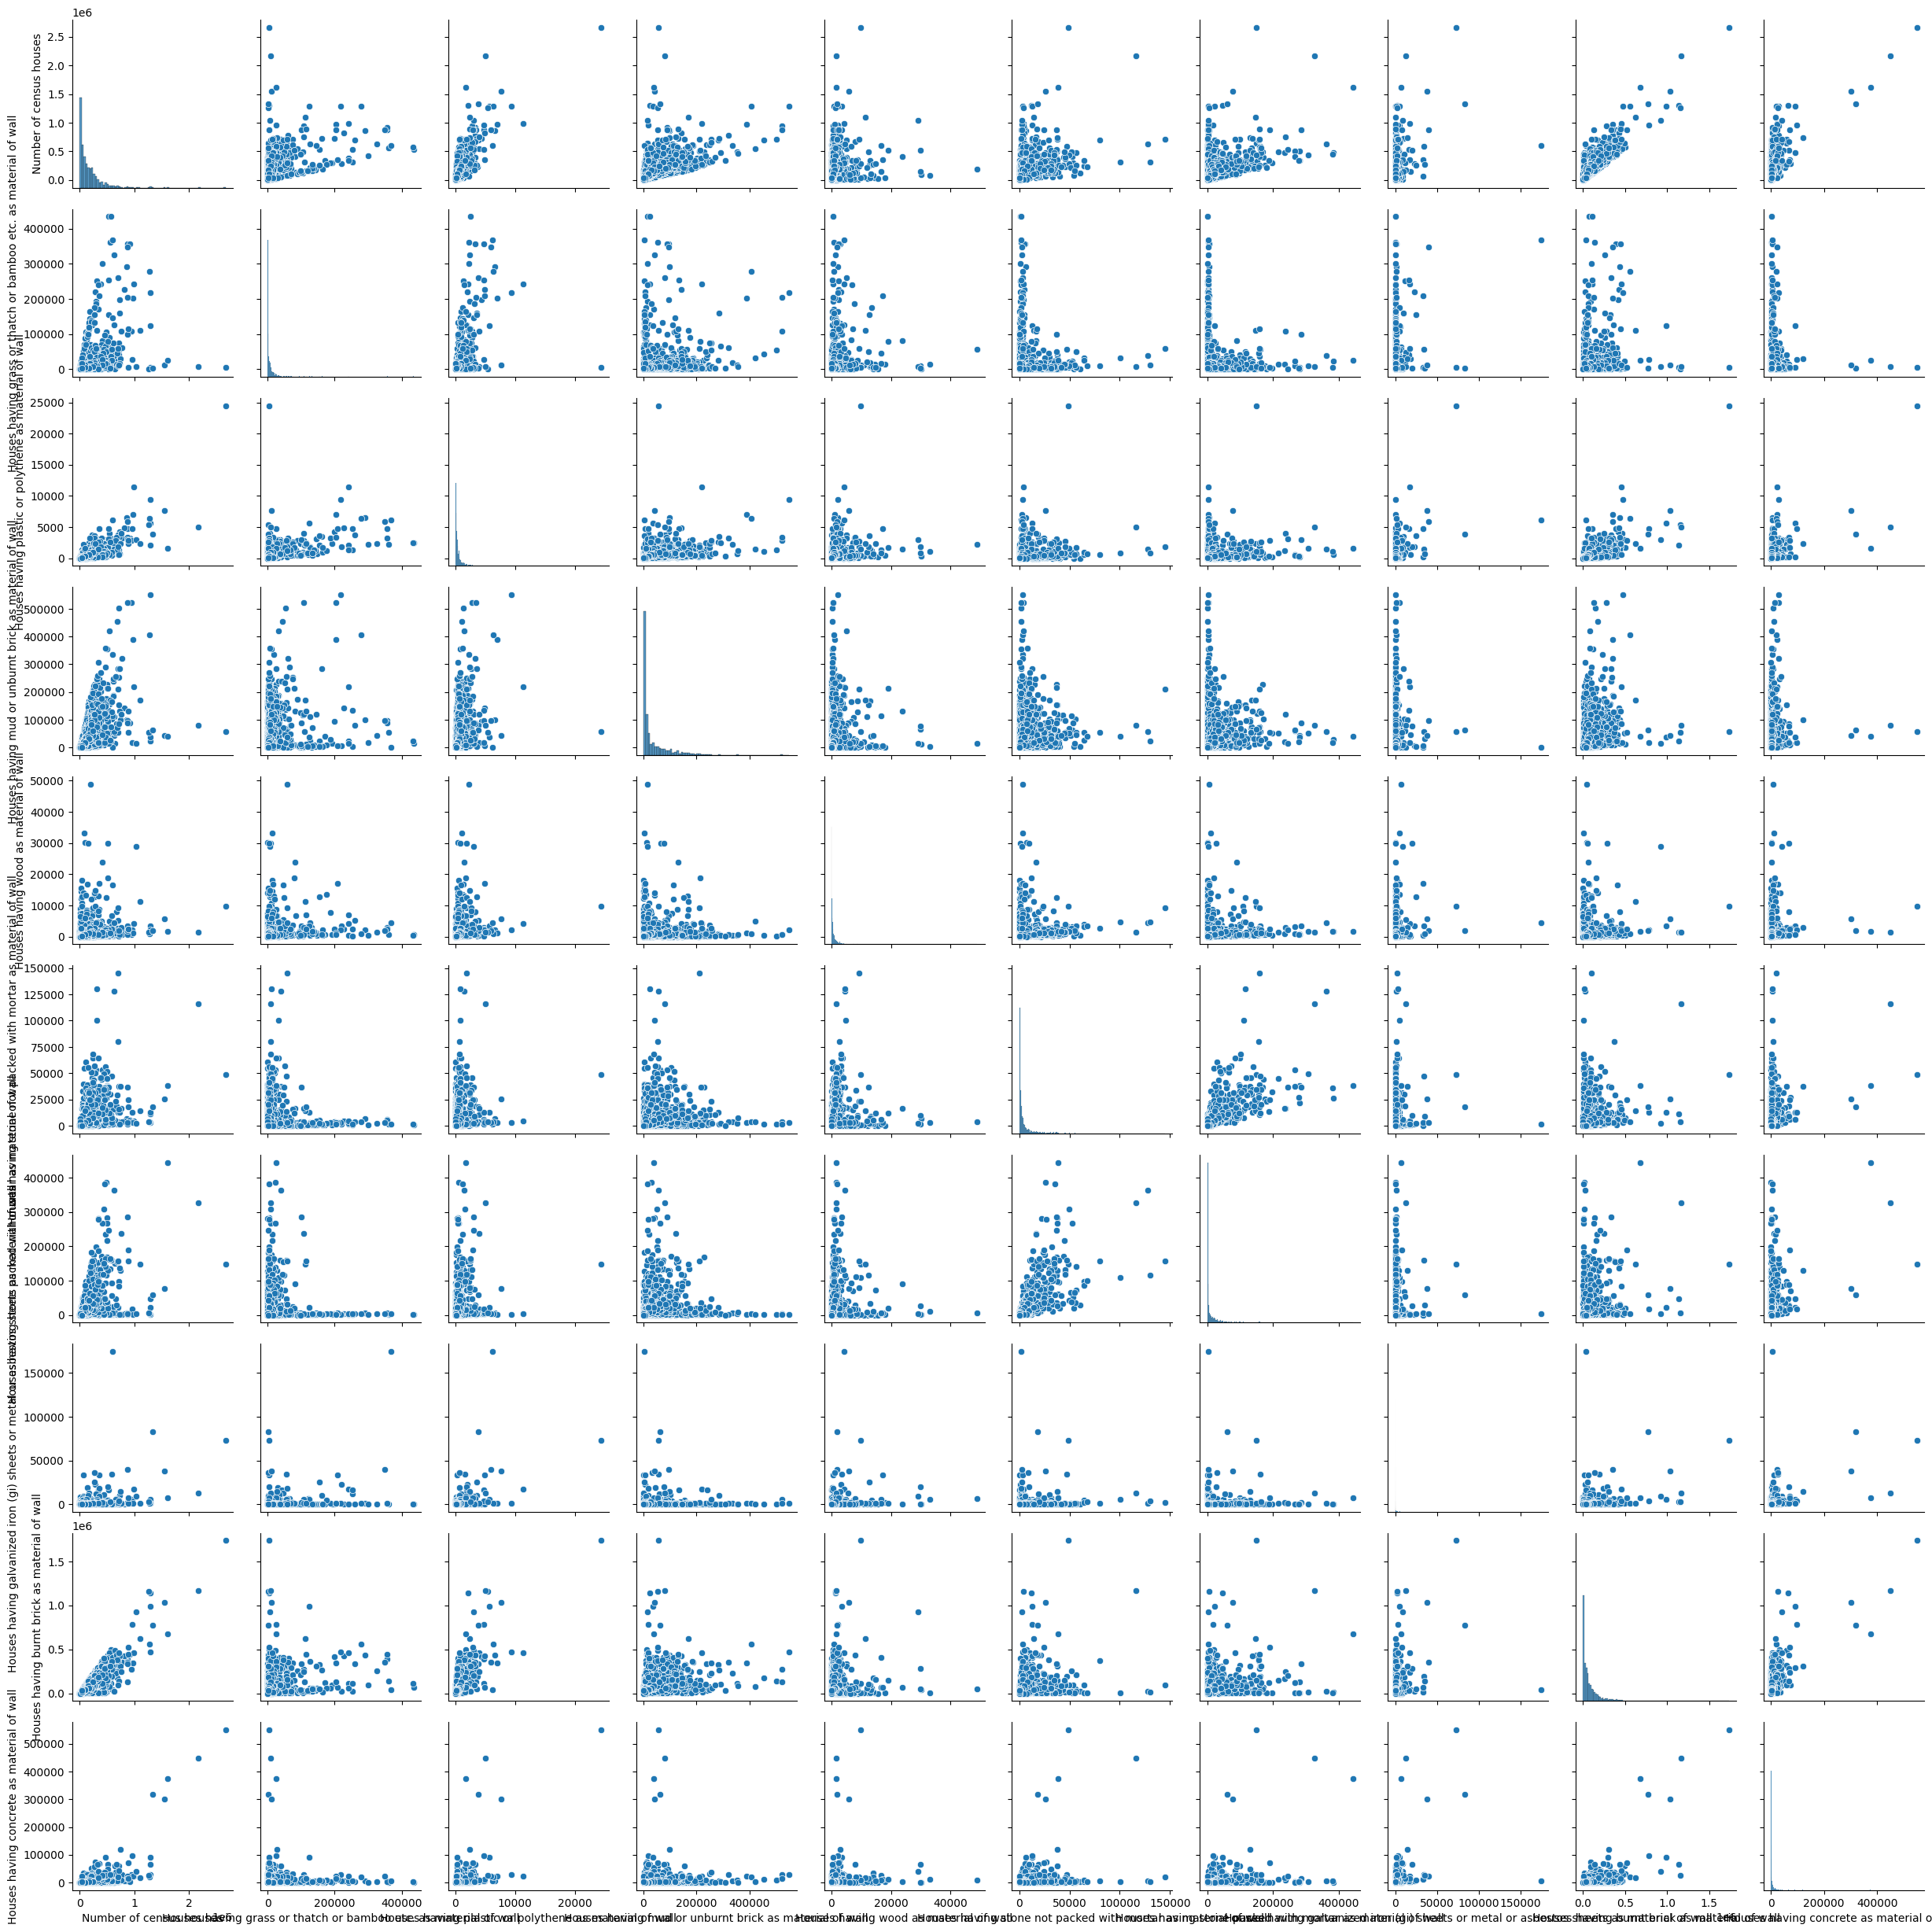

In [10]:
#Making a scatter pair plot for continuous variables

df1=df.iloc[:,8:18].copy()   #Copying the columns and making new dataframe
sns.pairplot(df1)    #printing scatter plot

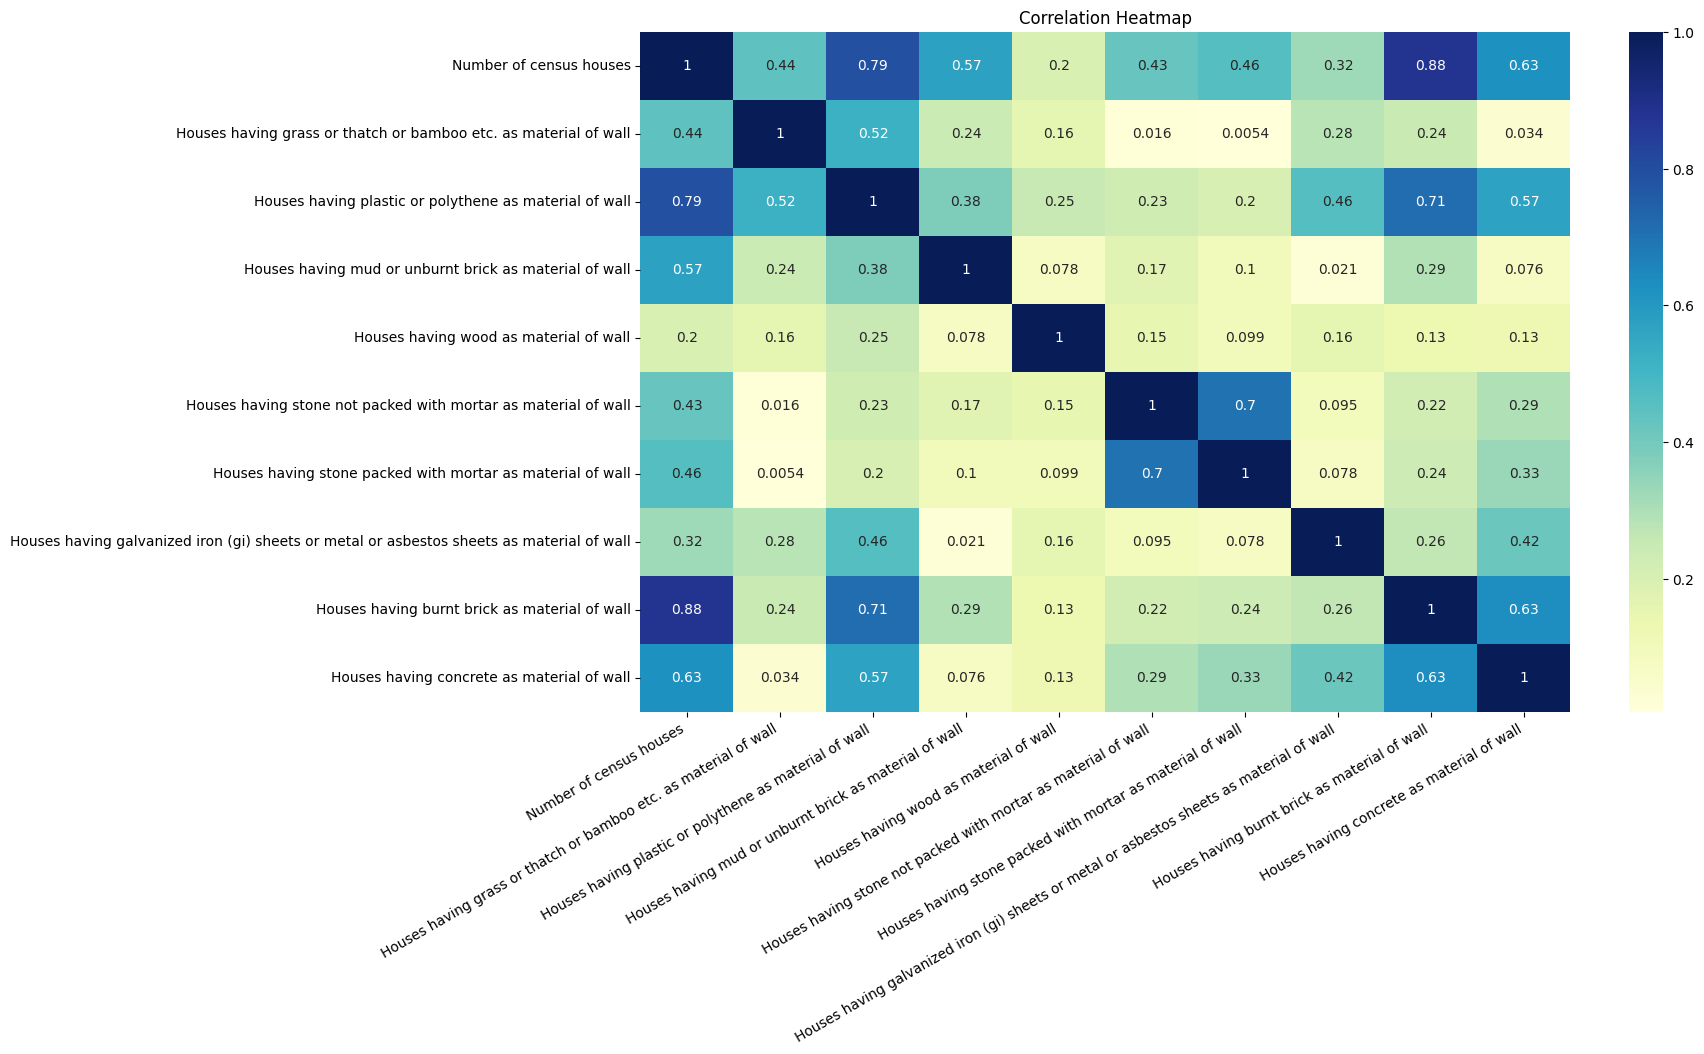

In [11]:
#Making a color coded correlation matrix

fig = plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(method='pearson'), annot = True, cmap="YlGnBu")  #Code for correlation matrix
plt.title("Correlation Heatmap")
fig.autofmt_xdate()
plt.show()

In [12]:
#Now doing the sum of columns J through S matches for all rows
M=[]    #Making a Array to store the sum of each row
sum=0   #Variable for storing sum and initializing it 

for i in range(len(df)):    #Using for loop to sum the values
    sum=0
    for j in range(9,19):
        sum=sum+df.iloc[i,j]
    M.append(sum)           #Storing the values

    
df.insert(19,"Sum of Columns",M,True)    #inserting new column in dataframe

In [13]:
# Now matching the sum of values with column i
K=[]        #Making a array to show the matching
for i in range(len(df)):
    if df["Sum of Columns"][i]-df["Number of census houses"][i]<0.00001:
        K.append("Matching")
    else:
        K.append("Not Matching")
        
df.insert(20,"Checking",K,True)  
# df            #Printing dataframe

In [14]:
#Now making new columns to store percent

for i in range(1,11):      #For each column
    df['New'+str(i)]=(df.iloc[:,i+8])/(df['Number of census houses'])*100   #Making new columns in dataframe
df          #Printing Dataframe

Rowid Country  State lgd code  \
0         1   India               1   
1         2   India               1   
2         3   India               1   
3         4   India               1   
4         5   India               1   
...     ...     ...             ...   
1468   1469   India              38   
1469   1470   India              38   
1470   1471   India              38   
1471   1472   India              38   
1472   1473   India              38   

                                             State  District lgd code  \
0                                Jammu And Kashmir                  1   
1                                Jammu And Kashmir                  1   
2                                Jammu And Kashmir                  2   
3                                Jammu And Kashmir                  2   
4                                Jammu And Kashmir                  3   
...                                            ...                ...   
1468  The Dadra And Nagar Haveli And Daman And Diu                463   
1469  The Dadra And Nagar Haveli And Daman And Diu                464   
1470  The Dadra And Nagar Haveli And Daman And Diu                464   
1471  The Dadra And Nagar Haveli And Daman And Diu                465   
1472  The Dadra And Nagar Haveli And Daman And Diu                465   

                    District  Year Type of residence namely rural or urban  \
0                   Anantnag  2011                                   Rural   
1                   Anantnag  2011                                   Urban   
2                     Budgam  2011                                   Rural   
3                     Budgam  2011                                   Urban   
4                  Baramulla  2011                                   Rural   
...                      ...   ...                                     ...   
1468                   Daman  2011                                   Urban   
1469                     Diu  2011                                   Rural   
1470                     Diu  2011                                   Urban   
1471  Dadra And Nagar Haveli  2011                                   Rural   
1472  Dadra And Nagar Haveli  2011                                   Urban   

      Number of census houses  \
0                109465.00000   
1                 33522.00000   
2                 85561.57321   
3                 13136.00000   
4                120312.42680   
...                       ...   
1468              42352.00000   
1469               5410.00000   
1470               5279.00000   
1471              35408.00000   
1472              37655.00000   

      Houses having grass or thatch or bamboo etc. as material of wall  ...  \
0                                             270.00000                 ...   
1                                              69.00000                 ...   
2                                             134.18227                 ...   
3                                              49.00000                 ...   
4                                             410.81773                 ...   
...                                                 ...                 ...   
1468                                          202.00000                 ...   
1469                                            6.00000                 ...   
1470                                           11.00000                 ...   
1471                                        16428.00000                 ...   
1472                                         2156.00000                 ...   

           New1      New2       New3      New4       New5       New6  \
0      0.246654  1.215914  20.746357  2.753391   2.771662   0.438496   
1      0.205835  0.360957  20.306068  0.366923   0.799475   0.277430   
2      0.156825  0.197484   8.384931  1.122173   0.874737   0.357794   
3      0.373021  0.205542   7.117844  0.182704   1.423569   0.228380   
4      0.341459  

C:\Users\Hemant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


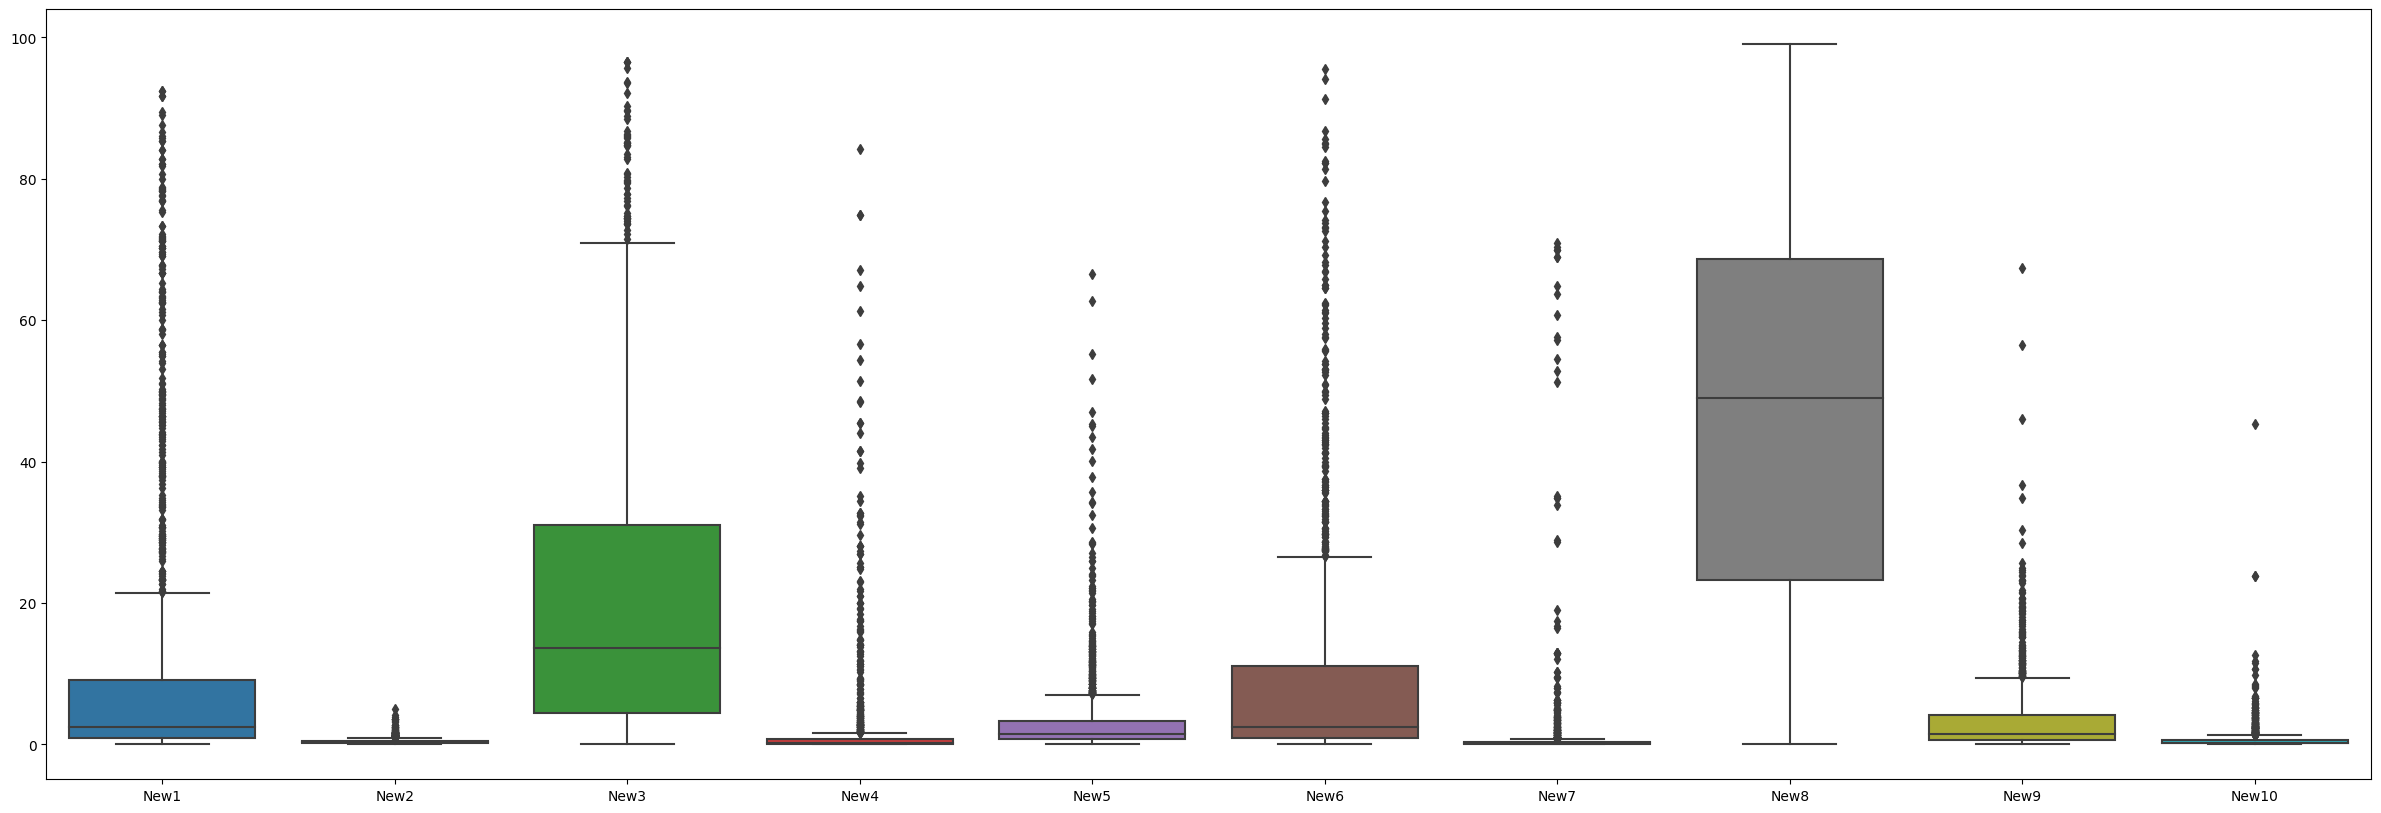

In [15]:
#Making boxplot and whiskers plot for new columns

df2=df.iloc[:,21:31].copy()  #Making New Dataframe to store all new columns

plt.figure(figsize=(30,10))  #Making box plot for all new columns
sns.boxplot(data=df2)        #Printing box plot
plt.show()


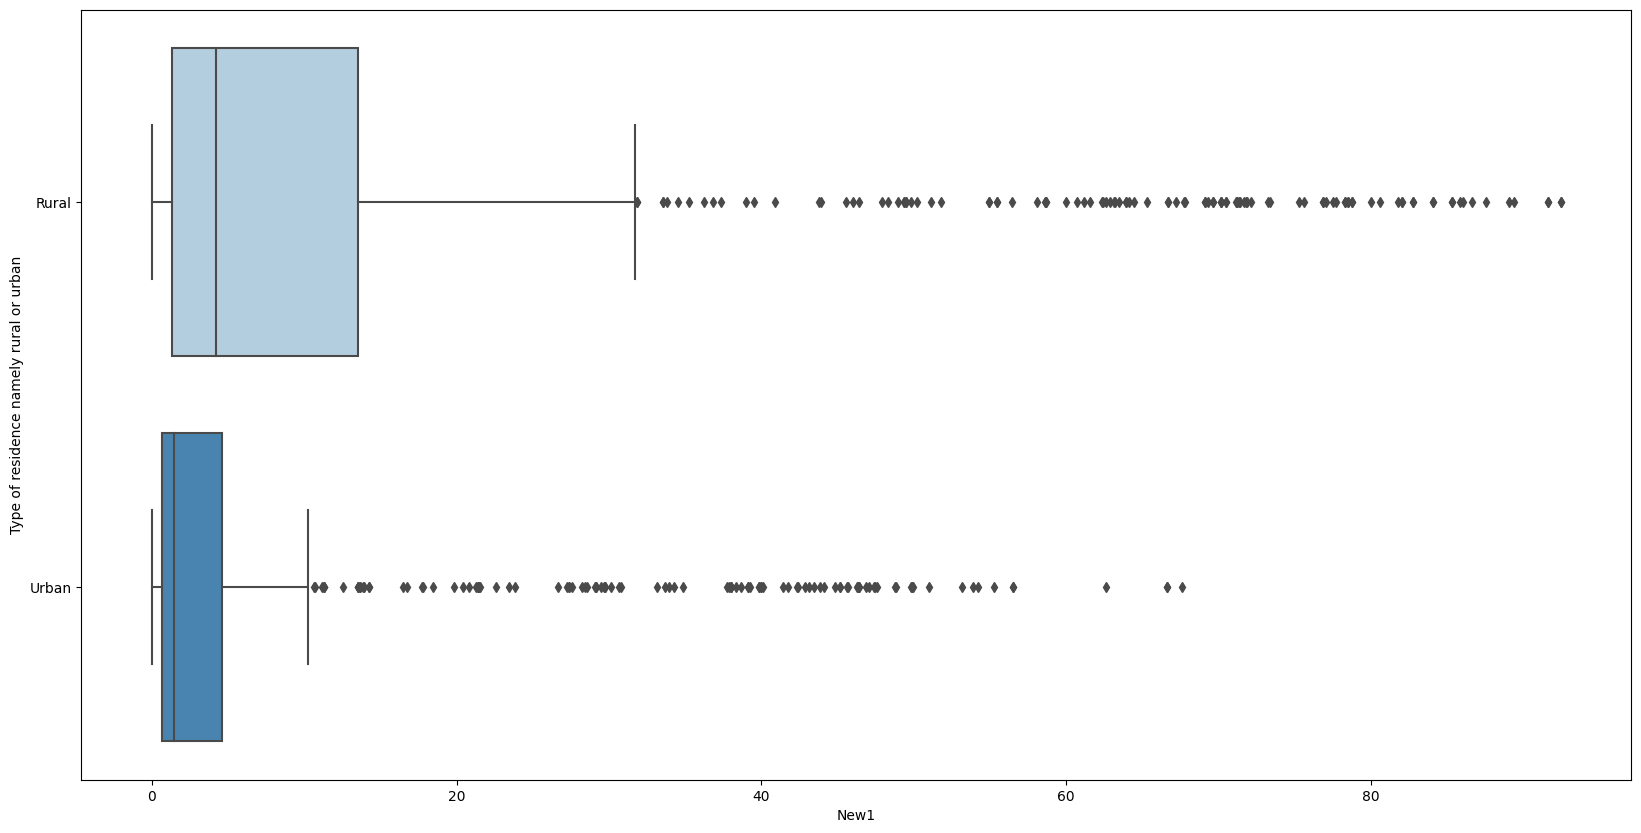

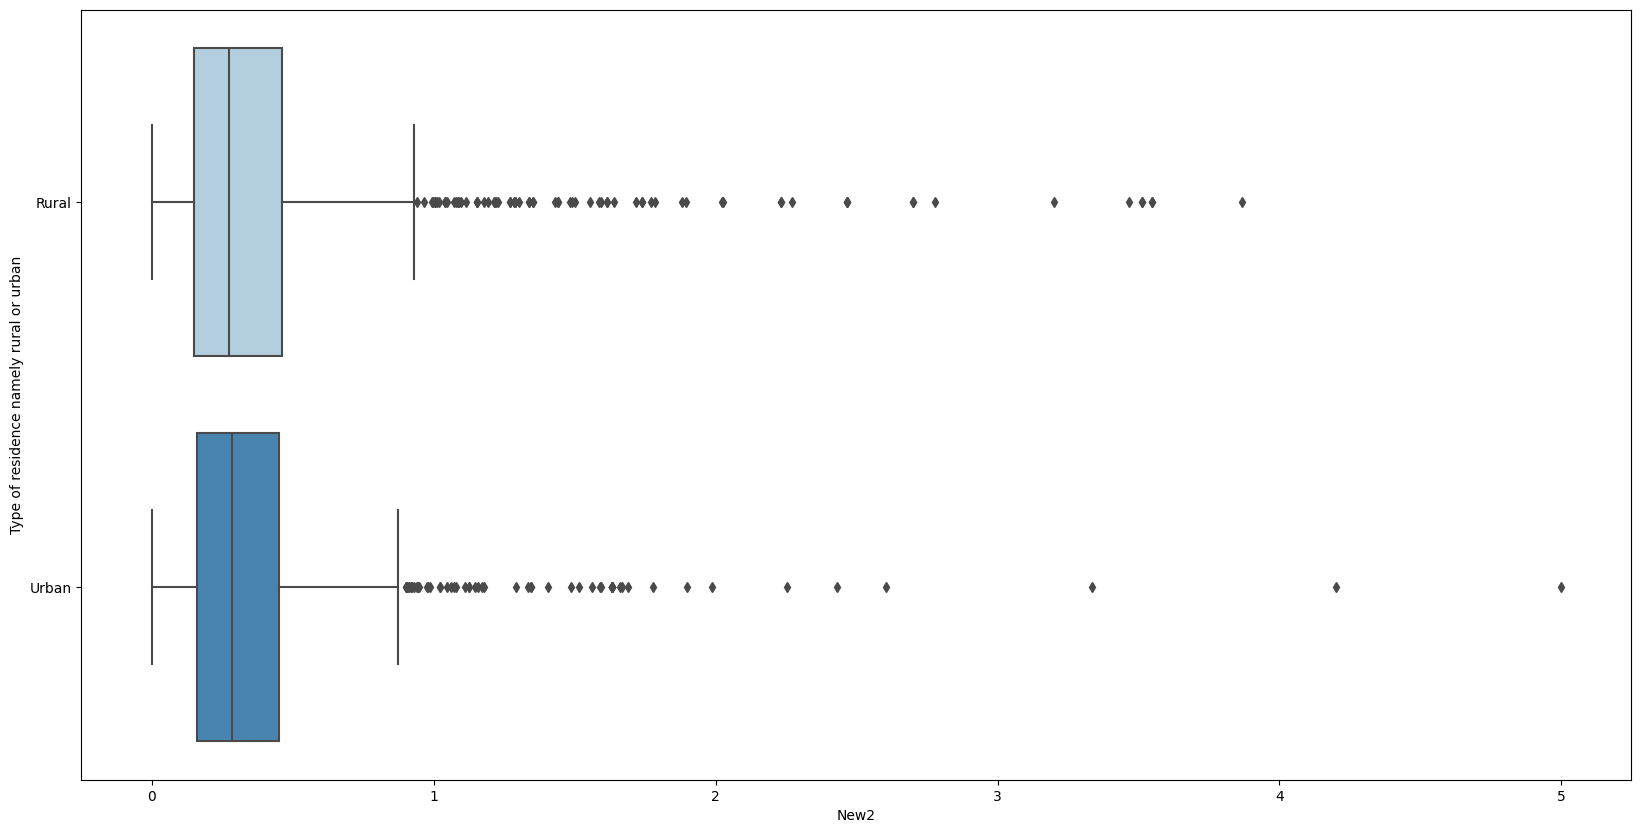

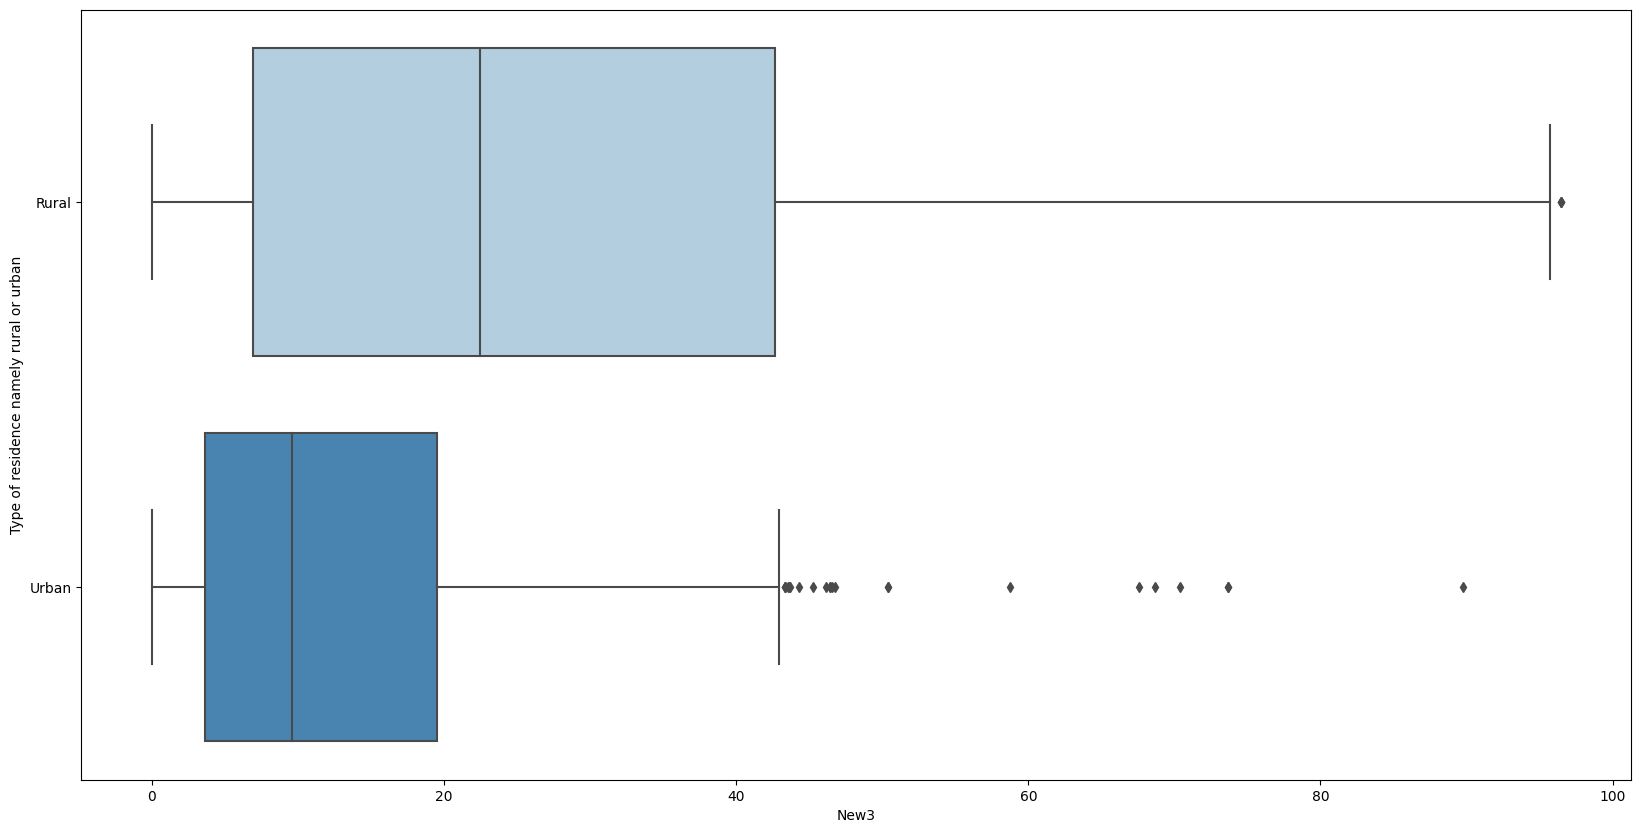

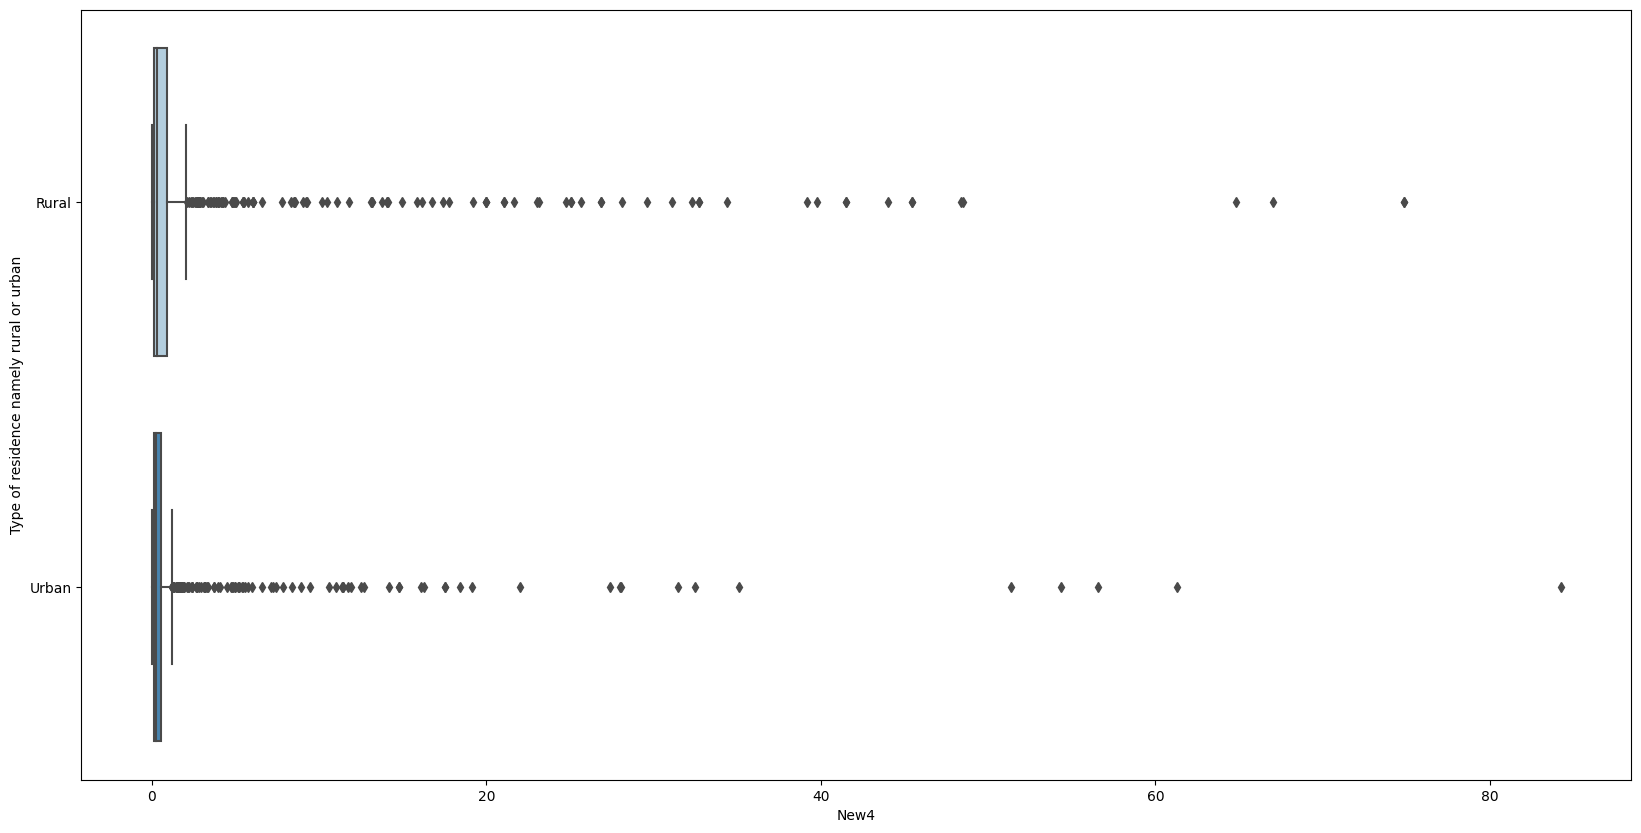

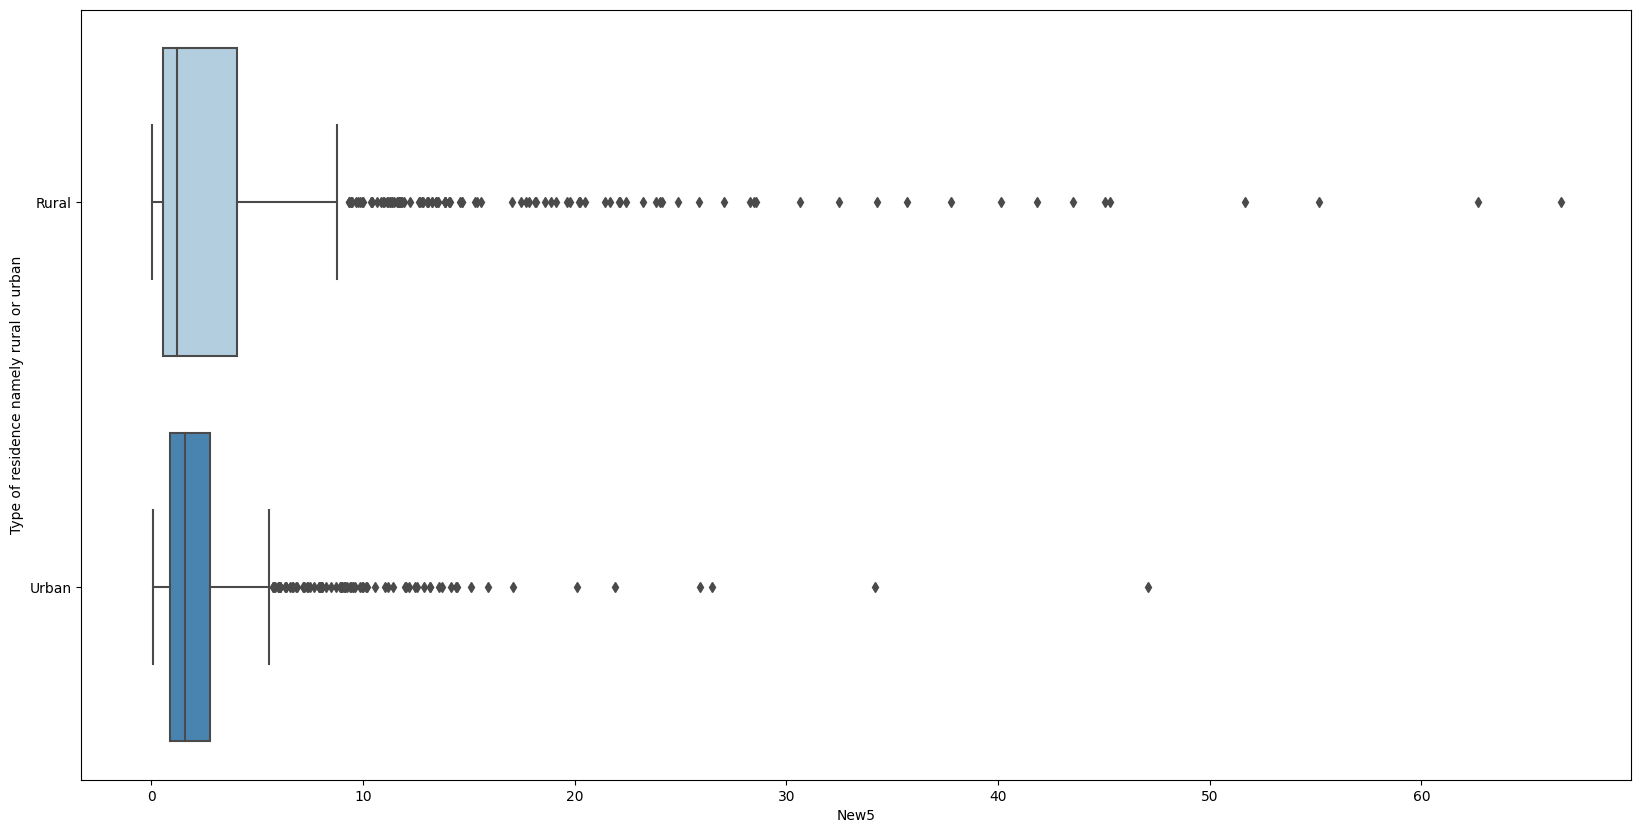

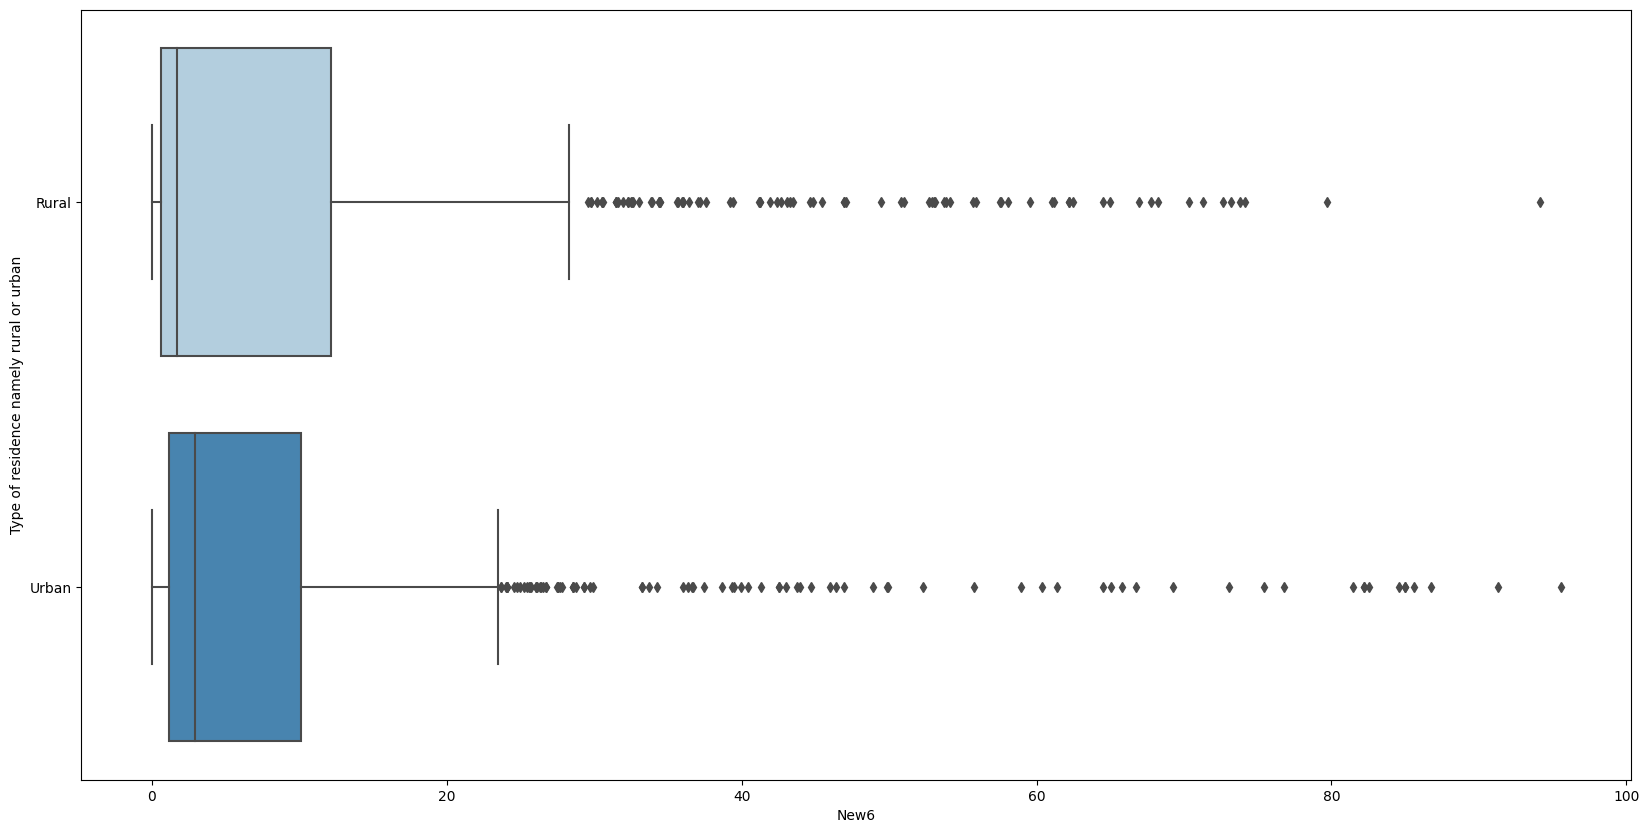

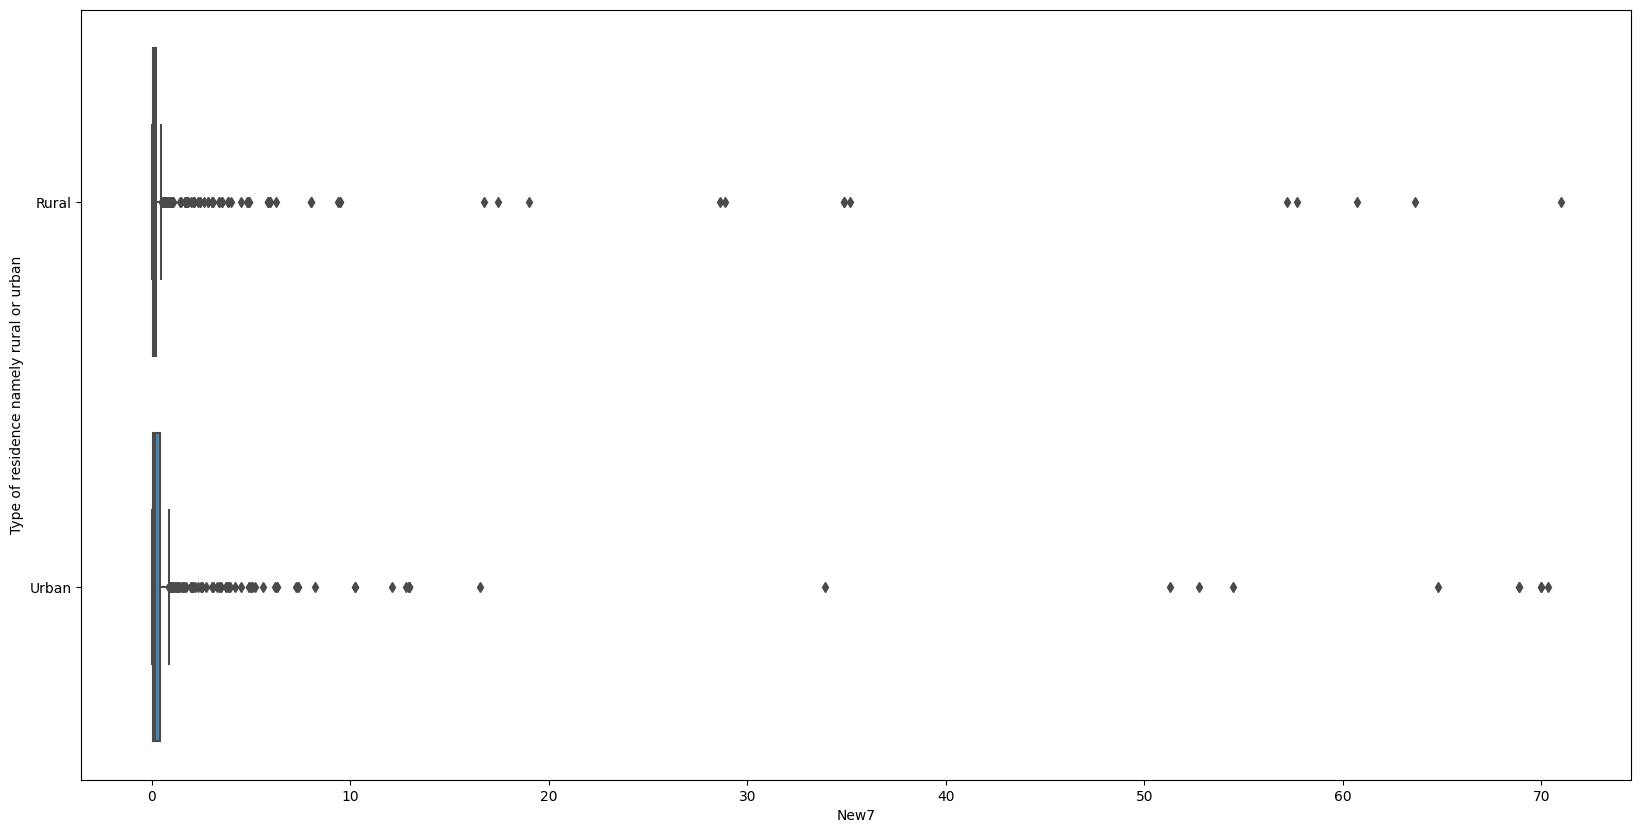

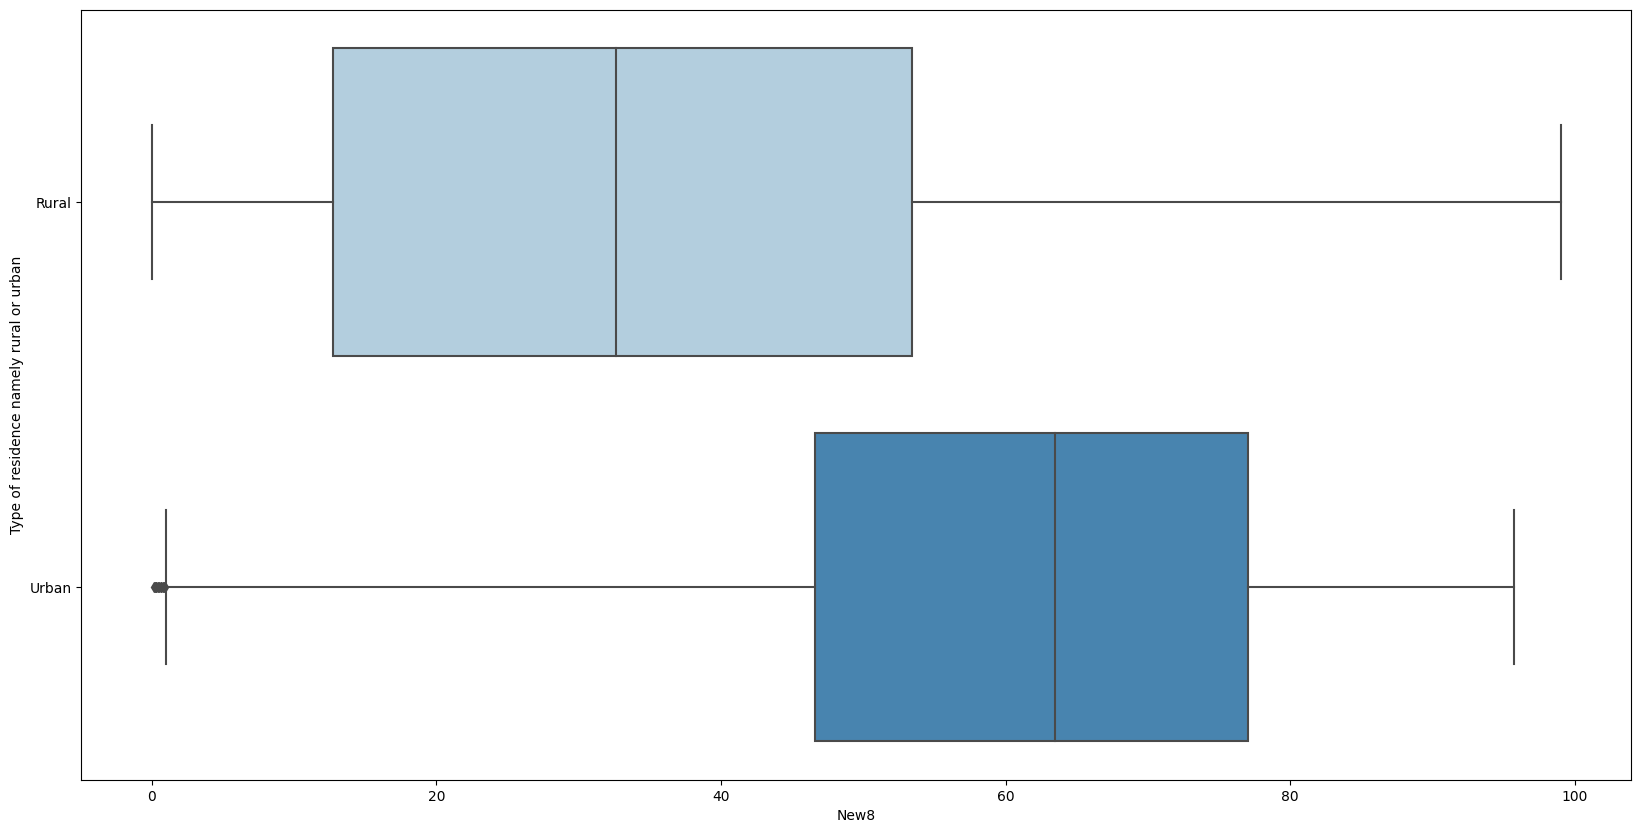

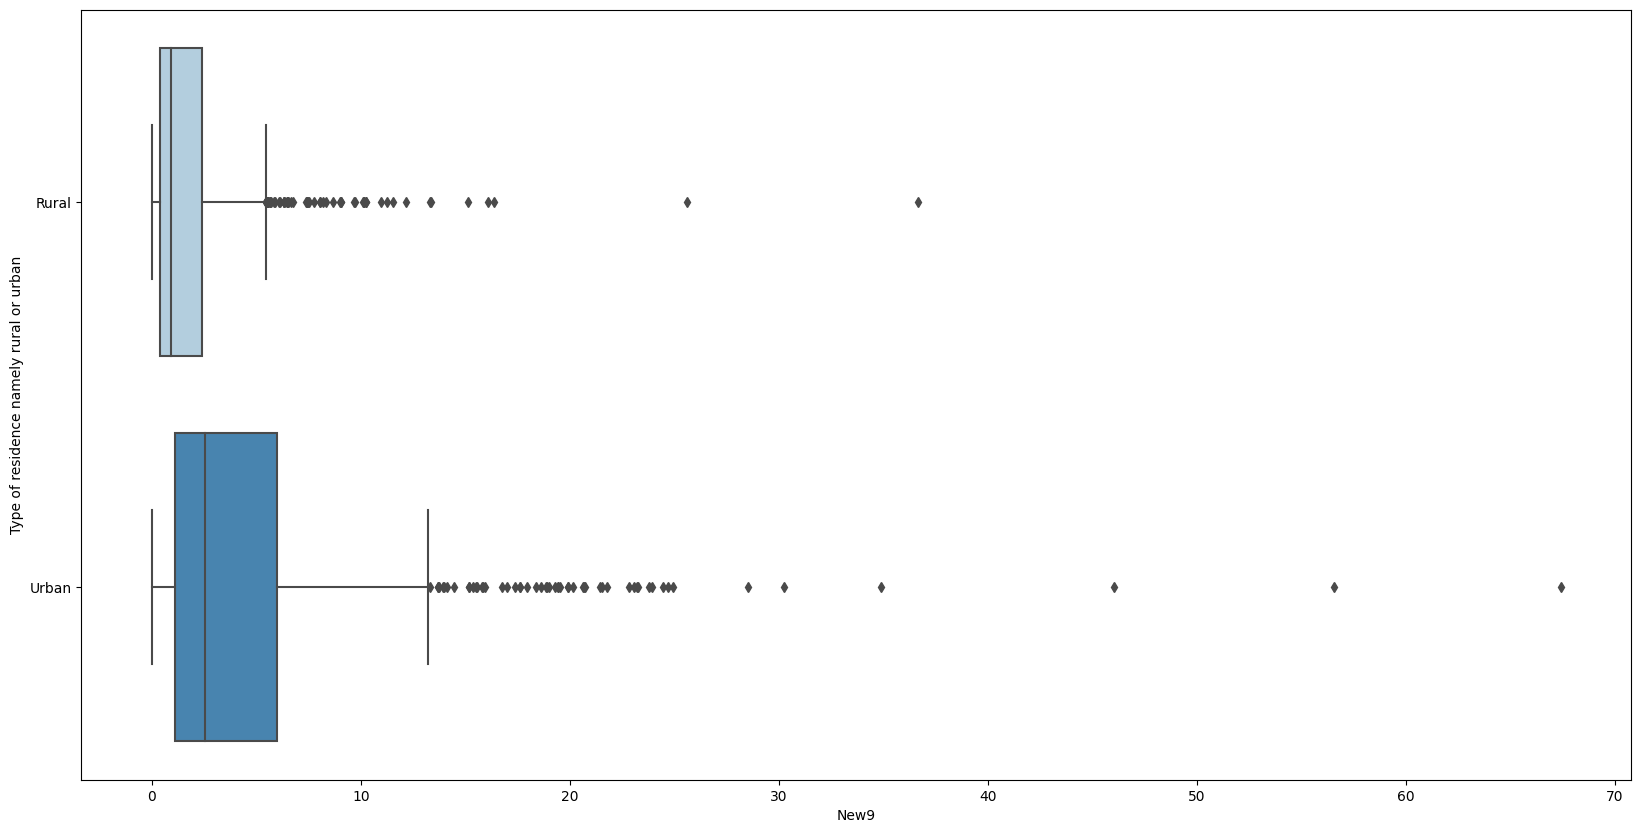

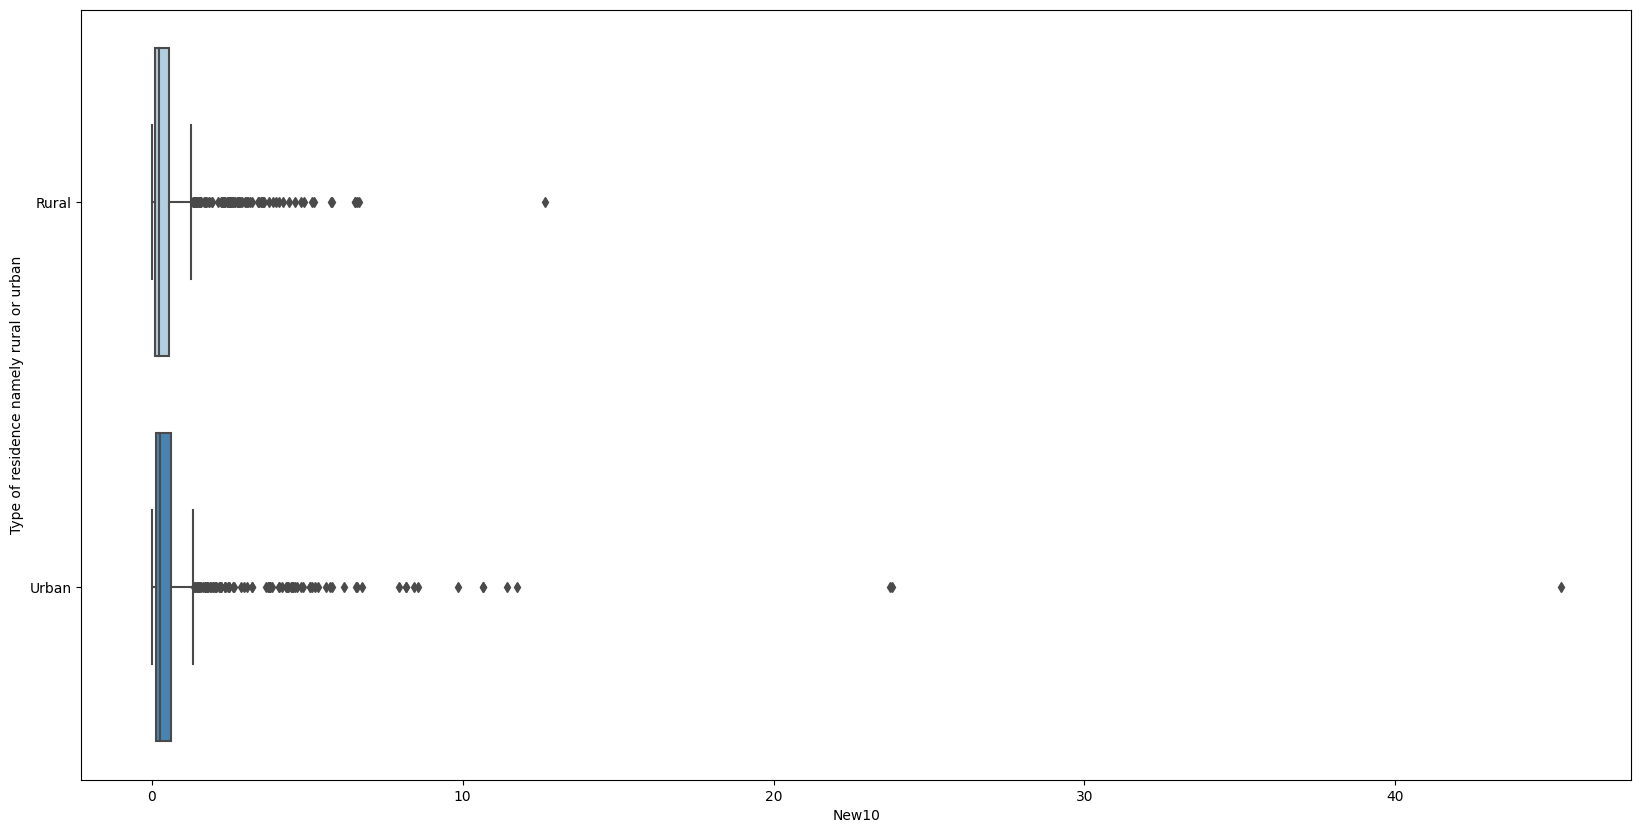

In [16]:
#Now making box and whiskers plot urban vs rural

for i in range(1,11):  #For each new column
    plt.figure(figsize=(20,10))
    sns.boxplot( y=df["Type of residence namely rural or urban"], x=df["New"+str(i)], palette="Blues")
    plt.show()

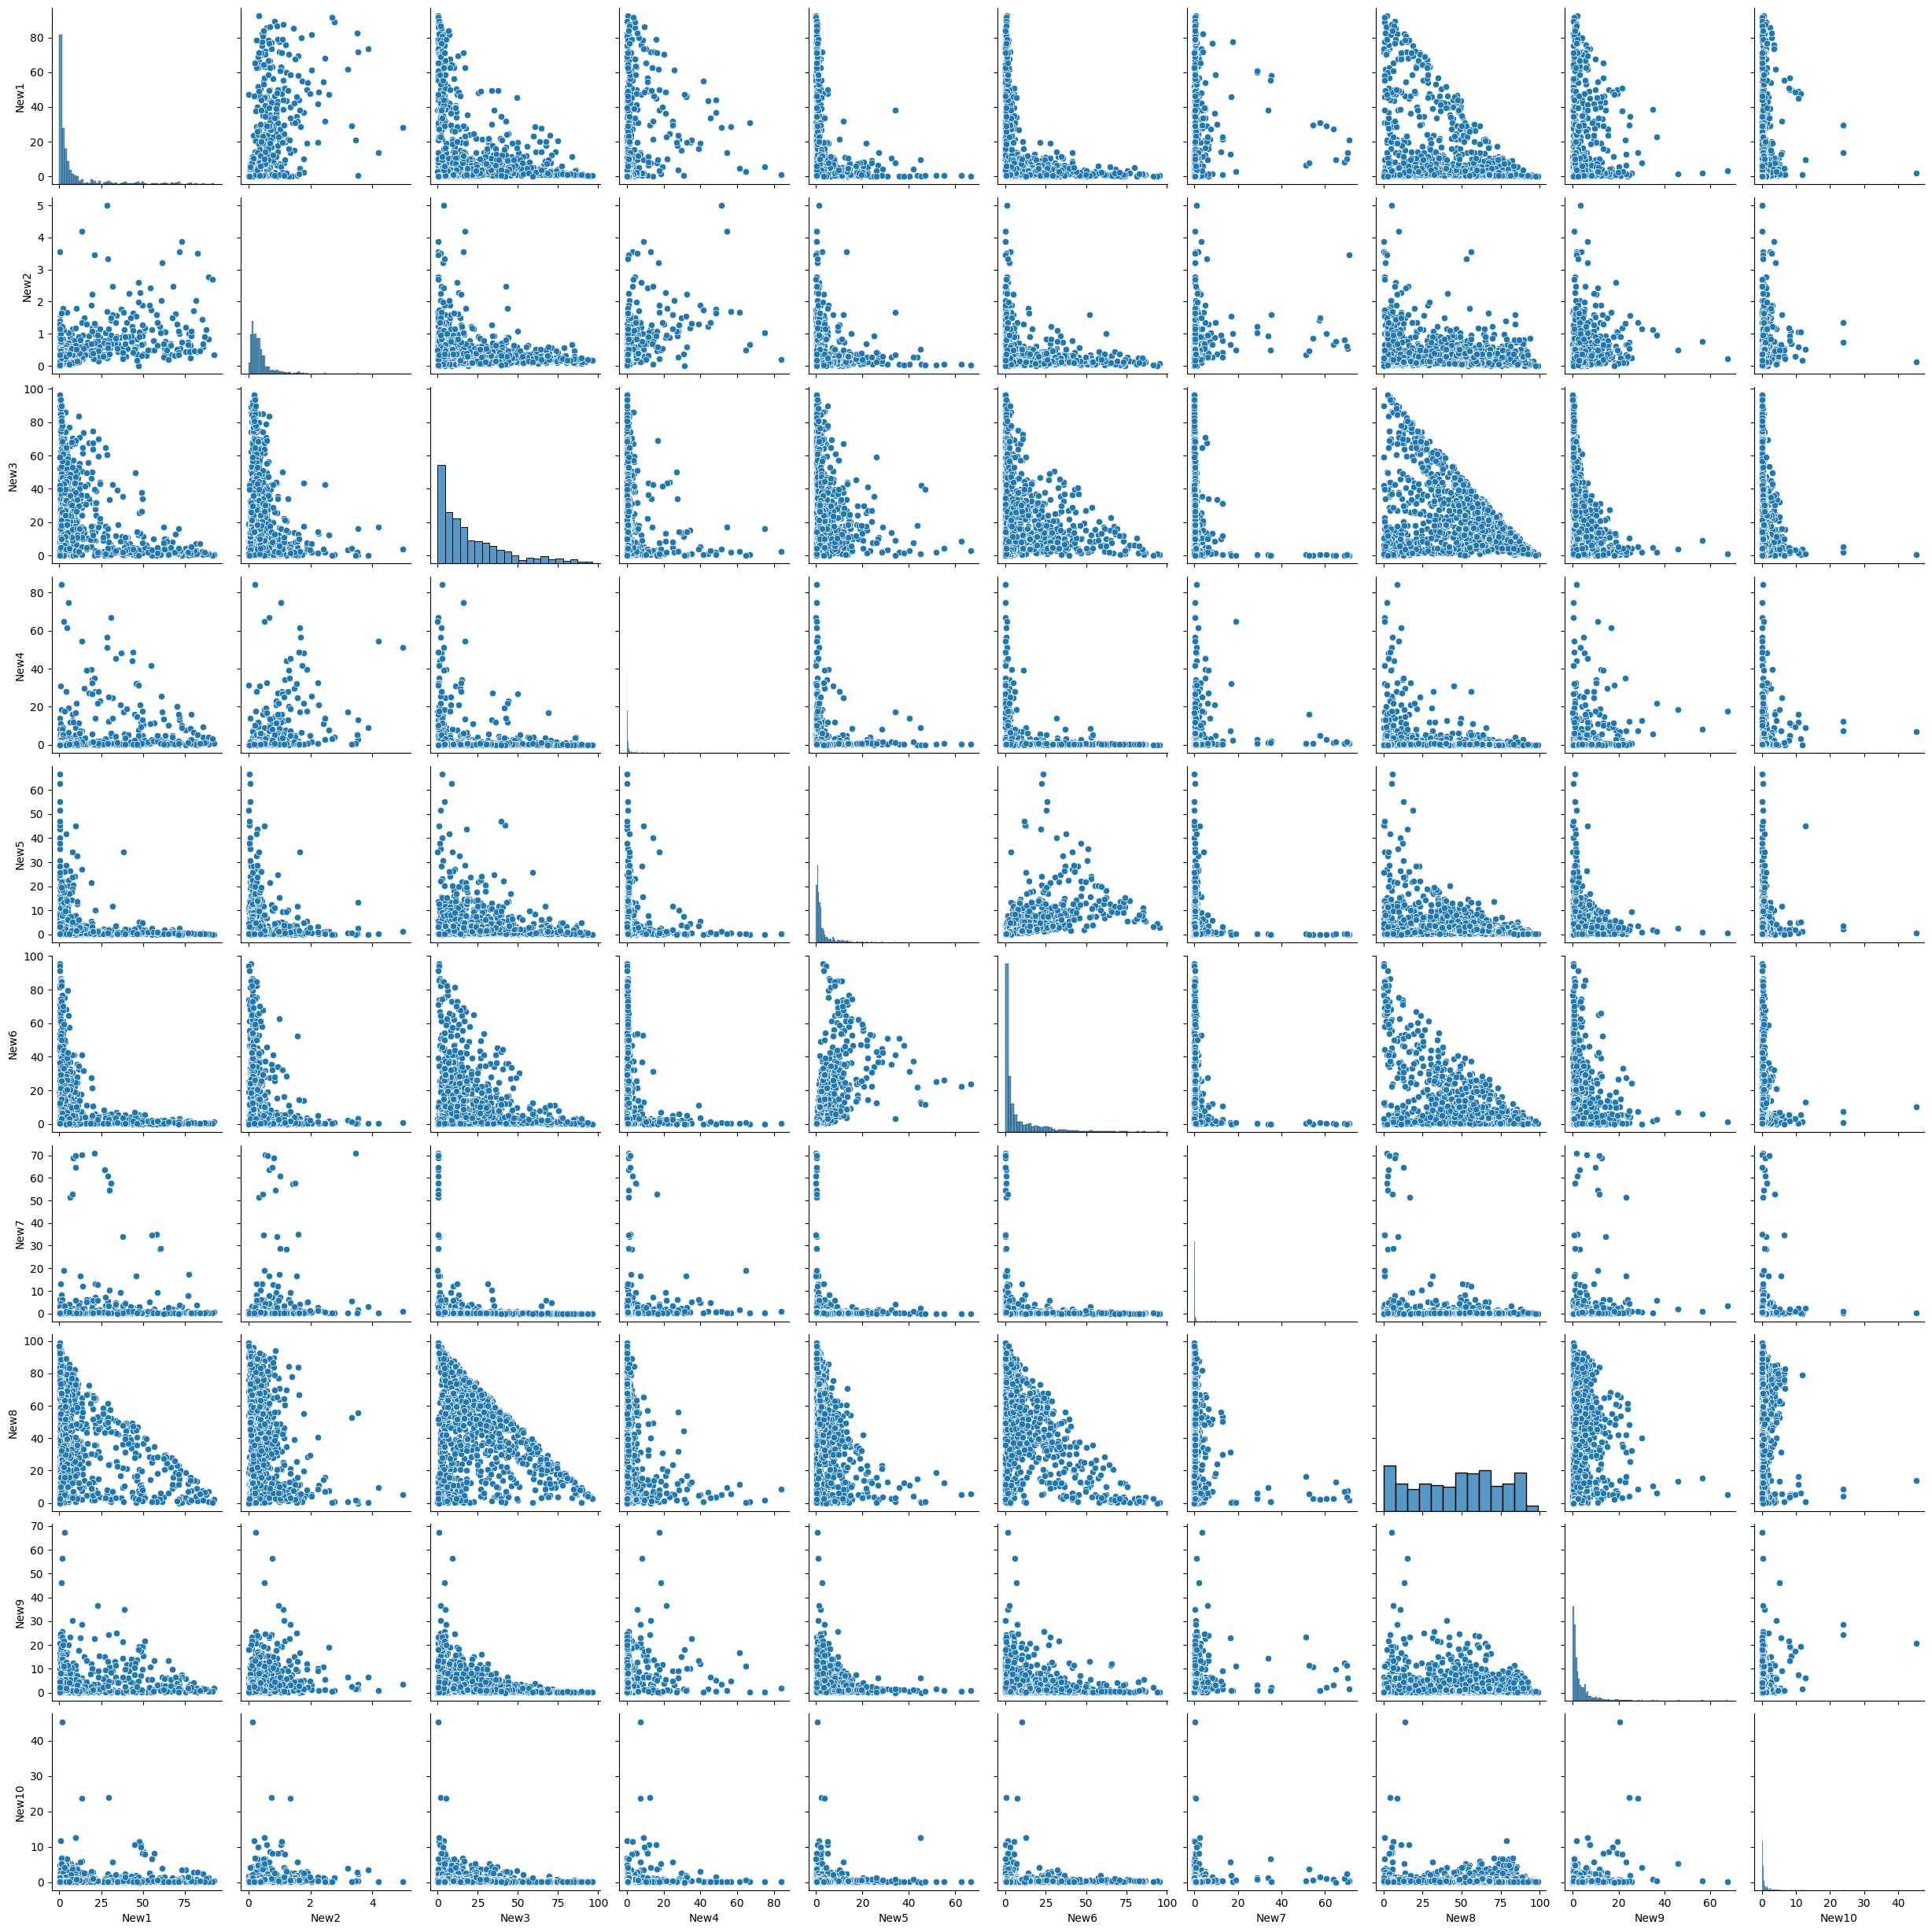

In [17]:
#Making a scatter pair plot for new columns
sns.pairplot(df2)

Text(0.5, 1.0, 'Correlation Heatmap')

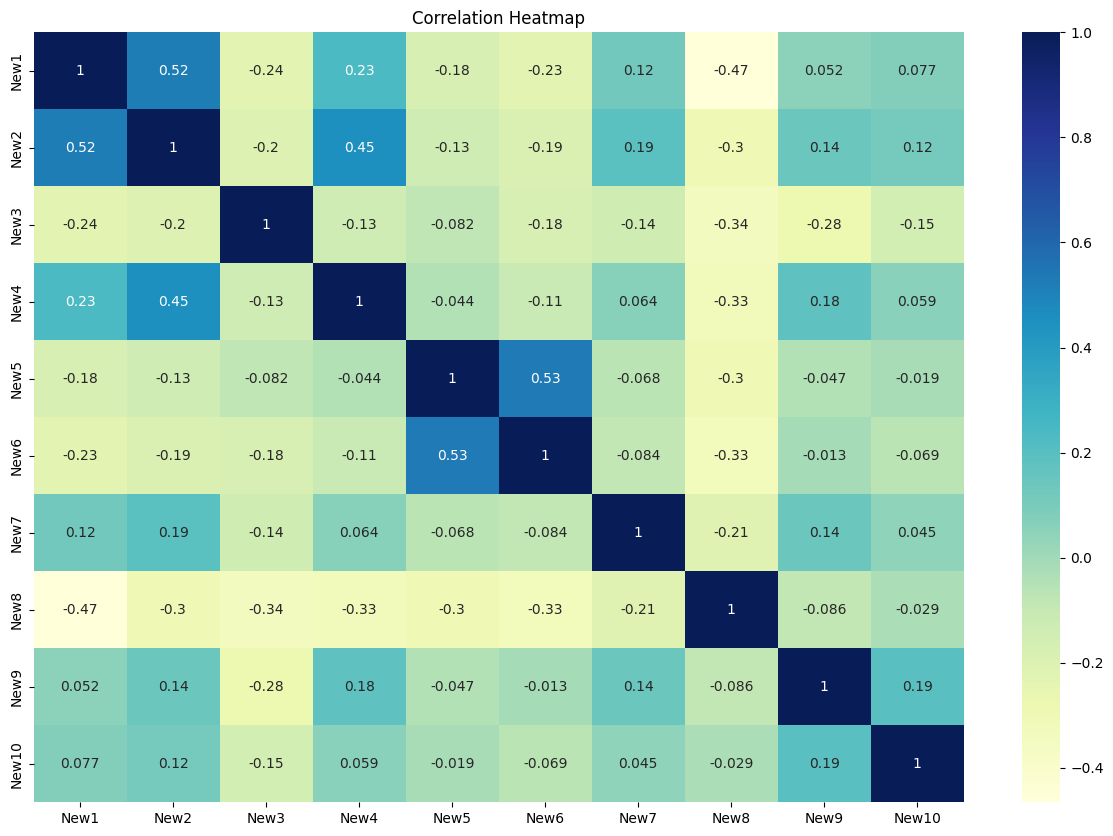

In [18]:
#Making color coded correlation matrix for new columns
fig = plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(method='pearson'), annot = True, cmap="YlGnBu")
plt.title("Correlation Heatmap")

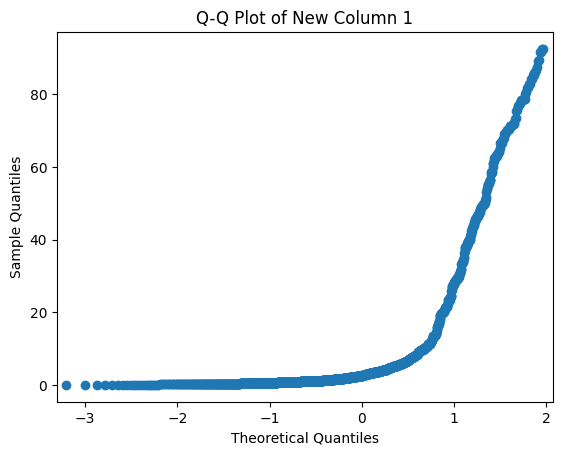

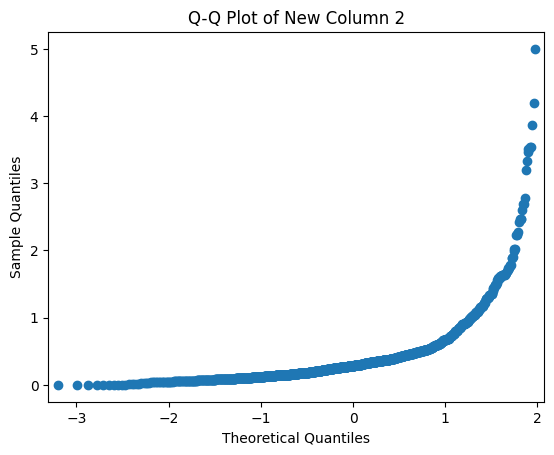

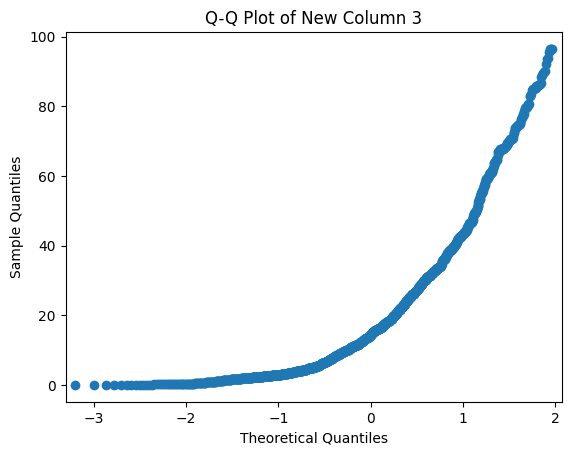

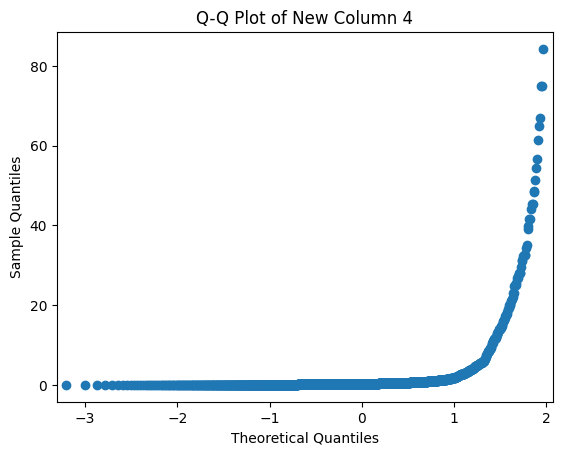

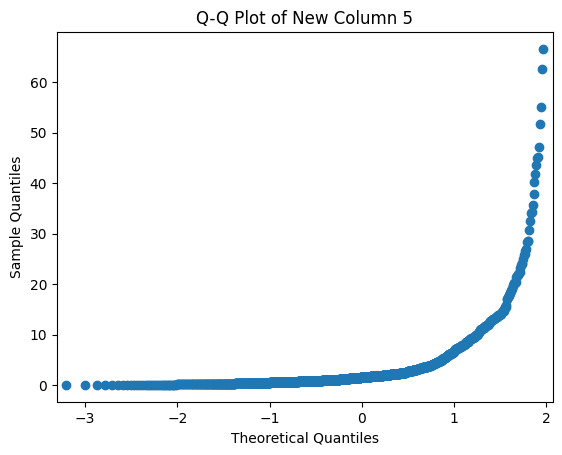

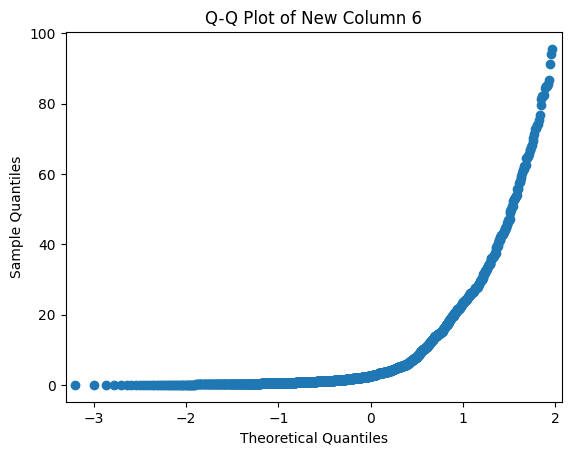

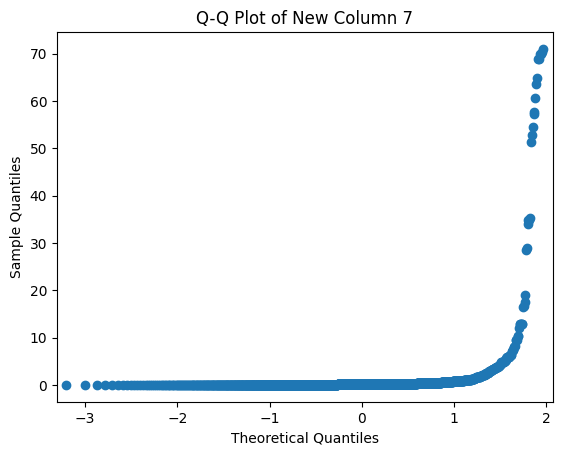

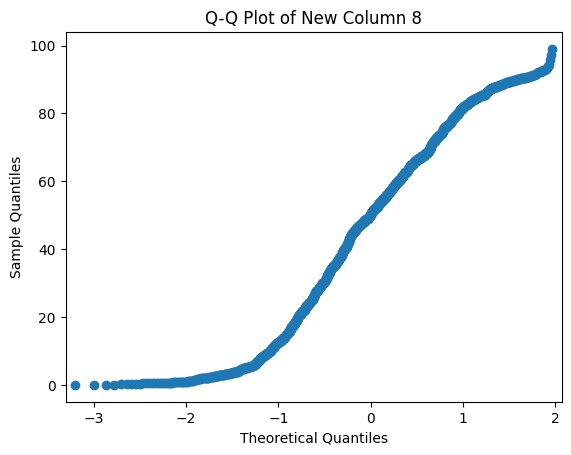

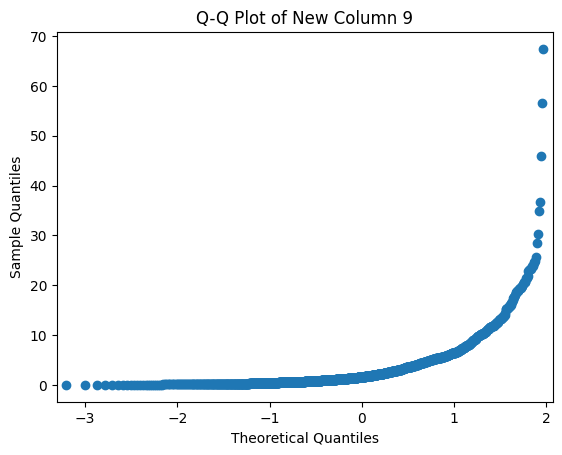

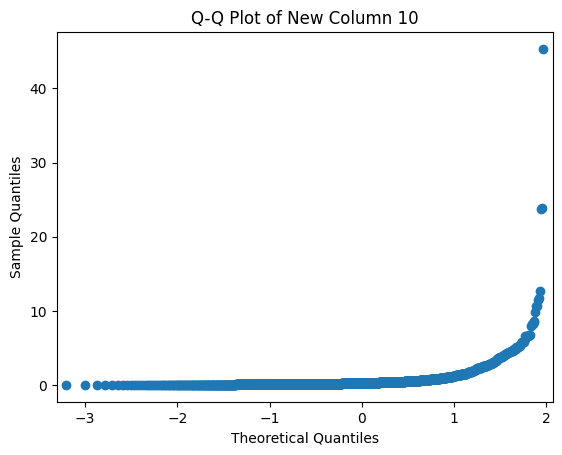

In [19]:
#Plotting QQ plot for gaussian distribution

for i in range(1,11):        #For each new columns
    h=df2['New'+str(i)].to_numpy()   
    sm.qqplot(h)           #Plotting qq plot
    plt.title("Q-Q Plot of New Column "+str(i))
    plt.show()

In [20]:
#Doing some additional EDA
df.describe()

Rowid  State lgd code  District lgd code    Year  \
count  1473.000000     1473.000000        1473.000000  1473.0   
mean    737.000000       17.992532        1047.480652  2011.0   
std     425.362786        9.885655       26046.686177     0.0   
min       1.000000        1.000000           1.000000  2011.0   
25%     369.000000        9.000000         185.000000  2011.0   
50%     737.000000       18.000000         369.000000  2011.0   
75%    1105.000000       24.000000         554.000000  2011.0   
max    1473.000000       38.000000      999999.000000  2011.0   

       Number of census houses  \
count             1.473000e+03   
mean              1.675086e+05   
std               2.115562e+05   
min               0.000000e+00   
25%               2.922170e+04   
50%               1.007775e+05   
75%               2.341100e+05   
max               2.665481e+06   

       Houses having grass or thatch or bamboo etc. as material of wall  \
count                                        1473.000000                  
mean                                        15010.514596                  
std                                         42860.469807                  
min                                             0.000000                  
25%                                           552.000000                  
50%                                          2269.000000                  
75%                                          9695.794629                  
max                                        434440.000000                  

       Houses having plastic or polythene as material of wall  \
count                                        1473.000000        
mean                                          558.438561        
std                                          1102.553775        
min                                             0.000000        
25%                                            86.000000        
50%                                           231.000000        
75%                                           595.000000        
max                                         24474.000000        

       Houses having mud or unburnt brick as material of wall  \
count                                        1473.000000        
mean                                        39685.387644        
std                                         64753.402723        
min                                             0.000000        
25%                                          2498.199858        
50%                                         10962.000000        
75%                                         50488.058280        
max                                        550577.000000        

       Houses having wood as material of wall  \
count                             1473.000000   
mean                              1150.497624   
std                               3084.039311   
min                                  0.000000   
25%                                 76.000000   
50%                                266.000000   
75%                                885.000000   
max                              48945.621080   

       Houses having stone not packed with mortar as material of wall  ...  \
count                                        1473.000000               ...   
mean                                         5617.638832               ...   
std                                         11965.336691               ...   
min                                             0.000000               ...   
25%                                           331.000000               ...   
50%                                          1429.036741               ...   
75%                                          4852.000000               ...   
max                                        145200.000000               ...   

              New1         New2         New3         New4         New5  \
count  1438.000000  1438.000000  1438.000000  1438.00

In [21]:
#Assignment Completed
